In [59]:
import pandas as pd
import numpy as np
import matplotlib
import plotnine as ggplot
from plotnine import *
%matplotlib inline

import glob
import re

import time
from pandas import DataFrame
from IPython.display import HTML

import sys
sys.path.append("fastai/old/")

import sys
sys.path.append("fastai/old/")
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer, OneHotEncoder
import os
import re
import glob
#os.environ["CUDA_VISIBLE_DEVICES"]="7"

from pandas import DataFrame
from IPython.display import HTML

import warnings
warnings.filterwarnings(action='once')
warnings.simplefilter('ignore')


In [60]:
import torch
import torch.nn as nn
import torch.utils.data as tdatautils

In [61]:
df = pd.read_csv("CSV/CSV_big3.csv")


### Boxplots data extraction

In [62]:
import ast
df = pd.read_csv("CSV_preds1.csv")
targets = ast.literal_eval(df.iloc[-1, -1])
y_hat_binary = ast.literal_eval(df.iloc[-1, -2])
y_hat = ast.literal_eval(df.iloc[-1, -3])

FileNotFoundError: [Errno 2] File b'CSV_preds1.csv' does not exist: b'CSV_preds1.csv'

In [ ]:
df = pd.read_csv("CSV_big.csv")

#### Uber lists for heatmap

In [63]:
# Extract filenames for heatmap

In [64]:
p0 = pd.Series(glob.glob("/home/maghoi/pMHC_data/features6/*0p*"))
p1 = pd.Series(glob.glob("/home/maghoi/pMHC_data/features6/*1p*"))
p2 = pd.Series(glob.glob("/home/maghoi/pMHC_data/features6/*2p*"))
p3 = pd.Series(glob.glob("/home/maghoi/pMHC_data/features6/*3p*"))
p4 = pd.Series(glob.glob("/home/maghoi/pMHC_data/features6/*4p*"))

###  Load uber-list

In [65]:
import pickle
uber_list = pickle.load(open("uber_list.pkl", "rb"))

In [66]:
df = pd.read_csv("all.csv")
df = df[df["Comment"].astype(str).str.contains("56")]
df.describe()

FileNotFoundError: [Errno 2] File b'all.csv' does not exist: b'all.csv'

In [413]:
df = pd.read_csv("aa.csv")
#df[df["Validation"].astype(str).str.contains(str(2))]

In [67]:
def feature_extract(score = [], filenames = [], comments = [], partitions = []):
    #Extracts features from CSV file
    dfs = pd.DataFrame()
    length = 100
    
    for i in range(len(filenames)):
        df = pd.read_csv(filenames[i])
        df = df[df["Comment"].astype(str).str.contains(comments[i])]
        
        if partitions:
            df = df[df["Validation"].astype(str).str.contains(str(partitions[i]))]
            length = 20
            
        df = df[score[i]][0:length]
        dfs = pd.concat([dfs, df], axis = 1)
    
    #Return
    dfs.columns = comments
    dfs.index = range(0, length)
    return dfs

In [68]:
def feature_extract2(score = [], filenames = [], comments = [], partitions = []):
    #Extracts features from CSV file
    dfs = pd.DataFrame()
    length = 100
    
    for i in range(len(filenames)):
        df = pd.read_csv(filenames[i])
        df = df[df["Comment"].astype(str).str.contains(comments[i])]
        
        if partitions:
            for i2 in range(len(partitions)):
                df = df[df["Validation"].astype(str).str.contains(str(partitions[i2]))]
                length = 20
            
        df = df[score[i]][0:length]
        dfs = pd.concat([dfs, df], axis = 1)
    
    #Return
    dfs.columns = comments
    dfs.index = range(0, length)
    return dfs

In [69]:
def feature_extract3(score = [], filenames = [], comments = [], partitions = [], length = 20):
    #Extracts features from CSV file
    dfs = pd.DataFrame()
    
    for i in range(len(filenames)):
        df = pd.read_csv(filenames[i])
        df = df[df["Comment"].astype(str).str.contains(comments[i])]
        
        if partitions:
            for i2 in range(len(partitions)):
                df = df[df["Validation"].astype(str).str.contains(str(partitions[i2]))]
            
        df = df[score[i]][-length:]
        dfs = pd.concat([dfs, df], axis = 1)
    
    #Return
    dfs.columns = comments
    dfs.index = range(0, length)
    return dfs

In [70]:
def stat_df(dfs, n = 3):
    #Returns score values per partition
    stat_df = pd.DataFrame(index = ["Correct", "AUC", "F1", "MCC", "Precision", "Recall", "TPR", "TNR"])
    for i in range(len(dfs)):
        stat_df[i] = np.round(dfs[i]["value"].values, n)
    return(stat_df)

In [71]:
# weird bug, force save csv as exactly the same with new changes
df = pd.read_csv("CSV/aa.csv")
df.iloc[100:200]["Comment"] = df.iloc[100:200]["Comment"].apply(lambda x: "AApep" + str(x))
df.iloc[100:200]
df.index = pd.Index(np.zeros(len(df.index), dtype = "int"))
df.to_csv("CSV/aa2.csv", index = True, index_label = False)

In [13]:
len(comments), len(filenames), len(["Pep", "Struc36", "5En", "10En", "S+10E",  "AAs",
           "old56", "Allnew", "All+10E", "All+5E",
             "AAs+5", "New60", "New64", "12New+5"]
)

(6, 6, 14)

In [14]:
df = feature_extract3(score = ["MCC"],
                     filenames = ["CSV/CSV_big3.csv"],
                     comments = "Test", partitions = [0])

TypeError: Index(...) must be called with a collection of some kind, 'Test' was passed

In [28]:
#amino sequence

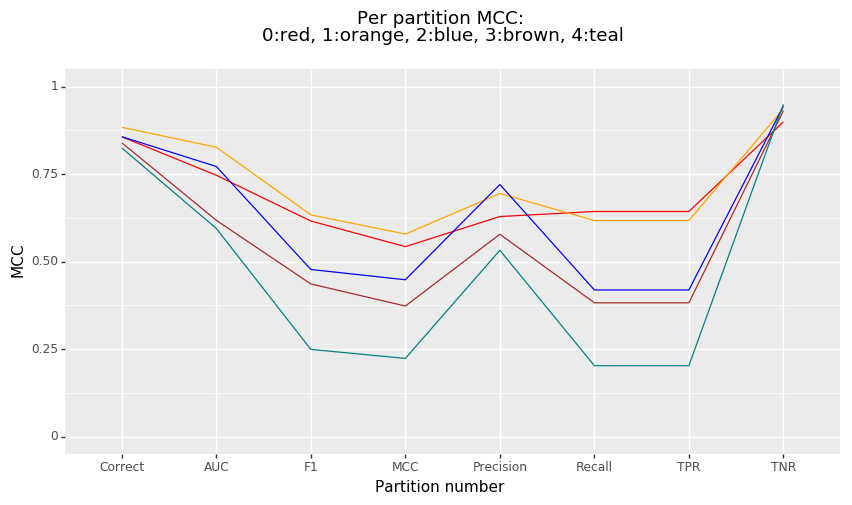

<ggplot: (8786641155318)>


In [355]:
dfs = []
for i in range(0,5):
    score = ["Correct", "AUC", "F1", "MCC", "Prec", "Rec", "TPR", "TNR"]

    filenames = ["CSV/CSV_big3.csv"]*8
    comments = ["AAs"]*8
    columns = ["Correct", "AUC", "F1", "MCC", "Precision", "Recall", "TPR", "TNR"]


    #columns = list(map(str, list(range(0,20))[0:len(filenames)]))
    df = feature_extract3(score = len(filenames)*score,
                         filenames = filenames,
                         comments = comments, partitions = [i],
                         length = 10)
    df.columns = columns
    df = pd.DataFrame(df.apply(np.average)).transpose() #Average
    melt_df = pd.melt(df.copy())
    melt_df["variable"] = pd.Categorical(melt_df["variable"], categories = df.columns, ordered=True)

    #Append
    melt_df["Validation set"] = pd.DataFrame([str(i)]*len(melt_df)) #Type for color
    dfs.append(melt_df)
#Append

title = "Per partition MCC:\n 0:red, 1:orange, 2:blue, 3:brown, 4:teal\n"

print((ggplot(melt_df, aes("variable", "value", group = 0)) #Group together averages
 + geom_line(data = dfs[0], color = "red")
 + geom_line(data = dfs[1], color = "orange")
 + geom_line(data = dfs[2], color = "blue")
 + geom_line(data = dfs[3], color = "brown")
 + geom_line(data = dfs[4], color = "teal")
 #+ geom_boxplot(data = melt_df, color = "red", alpha = 0.6, width = 0.8, linetype = "dashed", outlier_alpha = 0.6)
+ ylab("MCC")
+ xlab("Partition number")
+ scale_y_continuous(limit = [0, 1.0])
+ expand_limits(y = [1,0])
                   # breaks = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99],
                   #  labels = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

+ ggtitle(title)
+ theme(figure_size =(10,5))
))


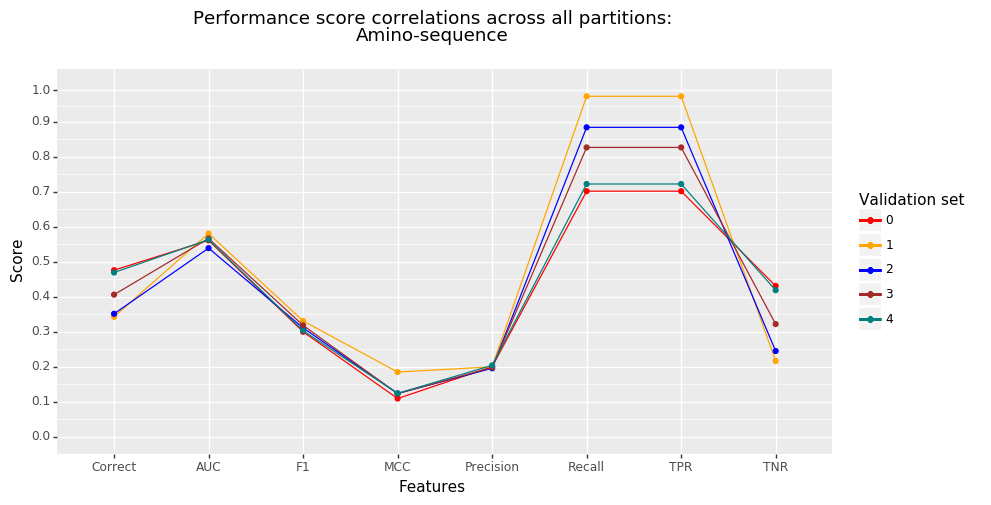

<ggplot: (-9223363250306071373)>
              0     1     2     3     4
Correct    0.48  0.34  0.35  0.41  0.47
AUC        0.56  0.58  0.54  0.57  0.56
F1         0.30  0.33  0.31  0.32  0.30
MCC        0.11  0.18  0.12  0.12  0.12
Precision  0.20  0.20  0.19  0.20  0.20
Recall     0.70  0.97  0.88  0.83  0.72
TPR        0.70  0.97  0.88  0.83  0.72
TNR        0.43  0.22  0.24  0.32  0.42


In [656]:
dfs = []
for i in range(0,5):
    score = ["Correct", "AUC", "F1", "MCC", "Prec", "Rec", "TPR", "TNR"]

    filenames = ["CSV/CSV_big3.csv"]*8
    comments = ["AApep"]*8
    columns = ["Correct", "AUC", "F1", "MCC", "Precision", "Recall", "TPR", "TNR"]


    #columns = list(map(str, list(range(0,20))[0:len(filenames)]))
    df = feature_extract3(score = len(filenames)*score,
                         filenames = filenames,
                         comments = comments, partitions = [i],
                         length = 20)
    df.columns = columns
    df = pd.DataFrame(df.apply(np.average)).transpose() #Average
    melt_df = pd.melt(df.copy())
    melt_df["variable"] = pd.Categorical(melt_df["variable"], categories = df.columns, ordered=True)

    #Append
    melt_df["Validation set"] = pd.DataFrame([str(i)]*len(melt_df)) #Type for color
    dfs.append(melt_df)
#Append

print((ggplot(melt_df, aes("variable", "value", group = 0))
    + geom_point(aes(colour = "Validation set"), data = dfs[0])
    + geom_line(aes(colour = "Validation set"), data = dfs[0])
    + geom_point(aes(colour = "Validation set"), data = dfs[1])
    + geom_line(aes(colour = "Validation set"), data = dfs[1])
    + geom_point(aes(colour = "Validation set"), data = dfs[2])
    + geom_line(aes(colour = "Validation set"), data = dfs[2])
    + geom_point(aes(colour = "Validation set"), data = dfs[3])
    + geom_line(aes(colour = "Validation set"), data = dfs[3])
    + geom_point(aes(colour = "Validation set"), data = dfs[4])
    + geom_line(aes(colour = "Validation set"), data = dfs[4])
    + expand_limits(y=[1,0])
     + ylab("Score")
    + xlab("Features")
    + ggtitle("""Performance score correlations across all partitions:\nAmino-sequence\n""")
    + theme(figure_size =(10,5))
    + scale_color_manual(["red", "orange", "blue", "brown", "teal"])
     + scale_y_continuous(limit = [0, 1.0],
        breaks = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99],
        labels = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

))
print(stat_df(dfs, n = 2))


In [657]:
stat_df(dfs, n = 2)

,0,1,2,3,4
Correct,0.48,0.34,0.35,0.41,0.47
AUC,0.56,0.58,0.54,0.57,0.56
F1,0.30,0.33,0.31,0.32,0.30
MCC,0.11,0.18,0.12,0.12,0.12
Precision,0.20,0.20,0.19,0.20,0.20
Recall,0.70,0.97,0.88,0.83,0.72
TPR,0.70,0.97,0.88,0.83,0.72
TNR,0.43,0.22,0.24,0.32,0.42


In [658]:
dfs[4]

,variable,value,Validation set
0,Correct,0.46855,4
1,AUC,0.56235,4
2,F1,0.30215,4
3,MCC,0.12325,4
4,Precision,0.20330,4
5,Recall,0.72150,4
6,TPR,0.72150,4
7,TNR,0.41805,4


In [483]:
df = feature_extract3(score = ["MCC"],
                         filenames = ["CSV/CSV_big3.csv"],
                         comments = ["AAs"], partitions = [3],
                         length = 20)
print(np.mean(df[0:20]))
print(np.mean(df[20:]))

AAs    0.32685
dtype: float64
AAs    0.29745
dtype: float64


In [15]:
def validation_set_ggplot(score, comments, columns, filenames, length, title):
    dfs = []
    dfs2 = []
    
    for i in range(0,5):
        df = feature_extract3(score = len(filenames)*score,
                         filenames = filenames,
                         comments = comments, partitions = [i],
                         length = length)
        #df.columns = comments
        df.columns = columns

        df2 = df.copy() #keep track of variation
        df = pd.DataFrame(df.apply(np.average)).transpose() #Average

        melt_df = pd.melt(df.copy())
        melt_df["variable"] = pd.Categorical(melt_df["variable"], categories = df.columns, ordered=True)
        melt_df2 = pd.melt(df2.copy())
        melt_df2["variable"] = pd.Categorical(melt_df2["variable"], categories = df.columns, ordered=True)

        #Append
        melt_df["Validation set"] = pd.DataFrame([str(i)]*len(melt_df)) #Type for color
        melt_df2["Validation set"] = pd.DataFrame([str(i)]*len(melt_df2)) #Type for color

        dfs.append(melt_df)
        dfs2.append(melt_df2)
    #Append

    title = title

    print((ggplot(melt_df, aes("variable", "value", group = 0)) #Group together averages
        + geom_area(aes(colour = "Validation set"), data = dfs[0], alpha = 0.1)
         + geom_area(aes(colour = "Validation set"), data = dfs[1], alpha = 0.1)
         + geom_area(aes(colour = "Validation set"), data = dfs[2], alpha = 0.1)
         + geom_area(aes(colour = "Validation set"), data = dfs[3], alpha = 0.1)
         + geom_area(aes(colour = "Validation set"), data = dfs[4], alpha = 0.1)
        + ylab("MCC")
        + xlab("Training data features")
        + scale_y_continuous(breaks = [0.0, 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

        + ggtitle(title)
        + theme(figure_size =(10,5))
        + scale_color_manual(["red", "orange", "blue", "brown", "teal"])
    ))

In [885]:
dfs = []
for i in range(0,5):
    score = ["Correct", "AUC", "F1", "MCC", "Prec", "Rec", "TPR", "TNR"]

    filenames = filenames
    comments = comments
    columns = ["Correct", "AUC", "F1", "MCC", "Precision", "Recall", "TPR", "TNR"]


    #columns = list(map(str, list(range(0,20))[0:len(filenames)]))
    df = feature_extract3(score = len(filenames)*score,
                         filenames = filenames,
                         comments = comments, partitions = [i],
                         length = length)
    df.columns = columns
    df = pd.DataFrame(df.apply(np.average)).transpose() #Average
    
    dfs.append(df)
    
dfs = pd.concat(dfs)
dfs = pd.DataFrame(dfs.apply(np.average)).transpose() #Average
melt_df = pd.melt(dfs.copy())
melt_df["variable"] = pd.Categorical(melt_df["variable"], categories = df.columns, ordered=True)

#Append
#melt_df["Validation set"] = pd.DataFrame([str(i)]*len(melt_df)) #Type for color
#dfs.append(melt_df)

ValueError: Shape of passed values is (126, 2), indices imply (14, 2)

In [ ]:
#Compare 1-cycle, standard fit, RP unit, no residuals
comments = ["all80 S", "standard_no1c20","standard_randomprojection",
           "all80rpunit", "5mod_5resMod:5Res:3"]
columns = comments
filenames = ["CSV/CSV_big3.csv"] + ["CSV/CSV_Master.csv"]*2 + ["CSV/CSV_big3.csv"] + ["CSV/CSV_Master.csv"]
title = "1-cycle policy vs standard fit performance:\nAveraged partition performances, 20 epochs with early-stoppping\n"
names = ["1-cycle", "Standard fit", "Random projection", "RP2", "real 1-cycle"]

feature_scores_average_compare(comments, filenames, names, 5, title)

In [16]:
def feature_scores(comments, filenames, length, title):
    dfs = []
    for i in range(0,5):
        score = ["Correct", "AUC", "F1", "MCC", "Prec", "Rec", "TPR", "TNR"]

        filenames = filenames
        comments = comments
        columns = ["Correct", "AUC", "F1", "MCC", "Precision", "Recall", "TPR", "TNR"]


        #columns = list(map(str, list(range(0,20))[0:len(filenames)]))
        df = feature_extract3(score = len(filenames)*score,
                             filenames = filenames,
                             comments = comments, partitions = [i],
                             length = length)
        df.columns = columns
        df = pd.DataFrame(df.apply(np.average)).transpose() #Average
        melt_df = pd.melt(df.copy())
        melt_df["variable"] = pd.Categorical(melt_df["variable"], categories = df.columns, ordered=True)

        #Append
        melt_df["Validation set"] = pd.DataFrame([str(i)]*len(melt_df)) #Type for color
        dfs.append(melt_df)

    
    print((ggplot(melt_df, aes("variable", "value", group = 0))
        + geom_point(aes(colour = "Validation set"), data = dfs[0])
        + geom_line(aes(colour = "Validation set"), data = dfs[0])
        + geom_point(aes(colour = "Validation set"), data = dfs[1])
        + geom_line(aes(colour = "Validation set"), data = dfs[1])
        + geom_point(aes(colour = "Validation set"), data = dfs[2])
        + geom_line(aes(colour = "Validation set"), data = dfs[2])
        + geom_point(aes(colour = "Validation set"), data = dfs[3])
        + geom_line(aes(colour = "Validation set"), data = dfs[3])
        + geom_point(aes(colour = "Validation set"), data = dfs[4])
        + geom_line(aes(colour = "Validation set"), data = dfs[4])
        + expand_limits(y=[1,0])
         + ylab("Score")
        + xlab("Features")
        + ggtitle(title)
        + theme(figure_size =(10,5))
        + scale_color_manual(["red", "orange", "blue", "brown", "teal"])
         + scale_y_continuous(limit = [0, 1.0],
            breaks = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99],
            labels = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

    ))
    print(stat_df(dfs, n = 2))


In [998]:

for i in range(0,5):
    score = ["Prec"]
    columns = ["Precision"]

    df = feature_extract3(score = score,
                         filenames = ["CSV/CSV_Master2.csv"],
                         comments = ["standard_nodrop"], partitions = [i],
                         length = 20)
    df.columns = columns
    df = pd.DataFrame(df.apply(np.average)).transpose() #Average
    dfs.append(df)

#Average scores for all partitions
dfs = pd.concat(dfs)
dfs = pd.DataFrame(dfs.apply(np.average)).transpose() #Average
melt_df = pd.melt(dfs.copy())

ValueError: Length mismatch: Expected axis has 7 elements, new values have 20 elements

In [104]:
def feature_scores_average_compare(comments, filenames, names, length,
                                   title, expand_y = [0,1], alpha = 1,
                                  return_df = False):
    # Extract all features and averages them across all partitions
    # Graphs averaged partition performances for all files
    
    melt_dfs = []
    for i2 in range(len(filenames)):
        comment = [comments[i2]]*8
        filename = [filenames[i2]]*8
        dfs = []
        
        for i in range(0,5):
            score = ["Correct", "AUC", "F1", "MCC", "Prec", "Rec", "TPR", "TNR"]
            columns = ["Correct", "AUC", "F1", "MCC", "Precision", "Recall", "TPR", "TNR"]

            df = feature_extract3(score = len(filename)*score,
                                 filenames = filename,
                                 comments = comment, partitions = [i],
                                 length = length)
            df.columns = columns
            df = pd.DataFrame(df.apply(np.average)).transpose() #Average
            dfs.append(df)

        #Average scores for all partitions
        dfs = pd.concat(dfs)
        
        #Try to remove Nans
        dfs = pd.DataFrame(dfs.apply(np.nan_to_num)) #Remove Nans
        dfs = pd.DataFrame(dfs.apply(np.average)).transpose() #Average
        melt_df = pd.melt(dfs.copy())
        melt_df["variable"] = pd.Categorical(melt_df["variable"], categories = df.columns, ordered=True)
        melt_df["Type"] = pd.DataFrame([str(names[i2])]*len(melt_df)) #Type for color

        #Append averaged partition scores to melt_dfs
        melt_dfs.append(melt_df)
        
    #melt_dfs["Type"] = [names[0], names[1]]    

    #Print separate filename performances
    plot = (ggplot(melt_dfs[0], aes("variable", "value", group = 0))       
        + ylab("Score")
        + xlab("Features")
        + ggtitle(title)
        + theme(figure_size =(10,5), text = element_text(size = 14))
        + scale_y_continuous(breaks = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
    )
    if expand_y is not False:
        plot = (plot + expand_limits(y = expand_y))
    
    #Add points for all melt_dfs
    for i in range(len(melt_dfs)):
        plot = (plot + geom_point(aes(colour = "Type"), data = melt_dfs[i], size=2, alpha = alpha)
                 + geom_line(aes(colour = "Type"), data = melt_dfs[i], size = 0.8, alpha = alpha))
    #colors
    plot = (plot + scale_color_discrete())
    
    #Return plot
    if return_df:
        return(plot, melt_dfs)
    else:
        return(plot)


In [ ]:
#Compare 1-cycle, standard fit, RP unit, no residuals
comments = ["all80 S", "standard_no1c20","standard_randomprojection",
           "all80rpunit"]
columns = comments
filenames = ["CSV/CSV_big3.csv"] + ["CSV/CSV_Master.csv"]*2 + ["CSV/CSV_big3.csv"]
title = "1-cycle policy vs standard fit performance:\nAveraged partition performances, 20 epochs with early-stoppping\n"
names = ["1-cycle", "Standard fit", "Random projection", "RP2"]

feature_scores_average_compare(comments, filenames, names, 5, title)

In [ ]:
#Compare 1-cycle, standard fit, RP unit, no residuals
comments = ["all80 S", "standard_no1c20","standard_randomprojection",
           "all80rpunit", "5mod_5resMod:5Res:3"]
columns = comments
filenames = ["CSV/CSV_big3.csv"] + ["CSV/CSV_Master.csv"]*2 + ["CSV/CSV_big3.csv"] + ["CSV/CSV_Master.csv"]
title = "1-cycle policy vs standard fit performance:\nAveraged partition performances, 20 epochs with early-stoppping\n"
names = ["1-cycle", "Standard fit", "Random projection", "RP2", "real 1-cycle"]

feature_scores_average_compare(comments, filenames, names, 5, title)

In [1024]:
#Compare 1-cycle, standard fit, RP unit, no residuals
comments = ["0Res",
"2Res",
"3Res",
"4Res",
"5Res",
"6Res",
"7Res"]
comments = comments

columns = comments
filenames = ["CSV/CSV_Master2.csv"]*len(comments)
title = "Modules and residuals effect on model performance:\n"
names = comments

plot, melt_df = feature_scores_average_compare(comments, filenames, names, 5, title,
                                         expand_y = False, alpha = 1, return_df = True)

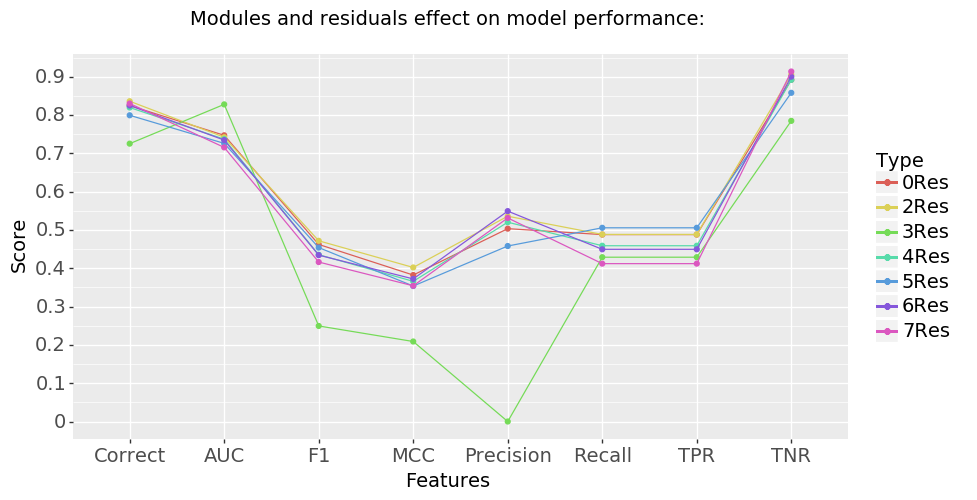

<ggplot: (-9223363250304767772)>

In [1025]:
plot

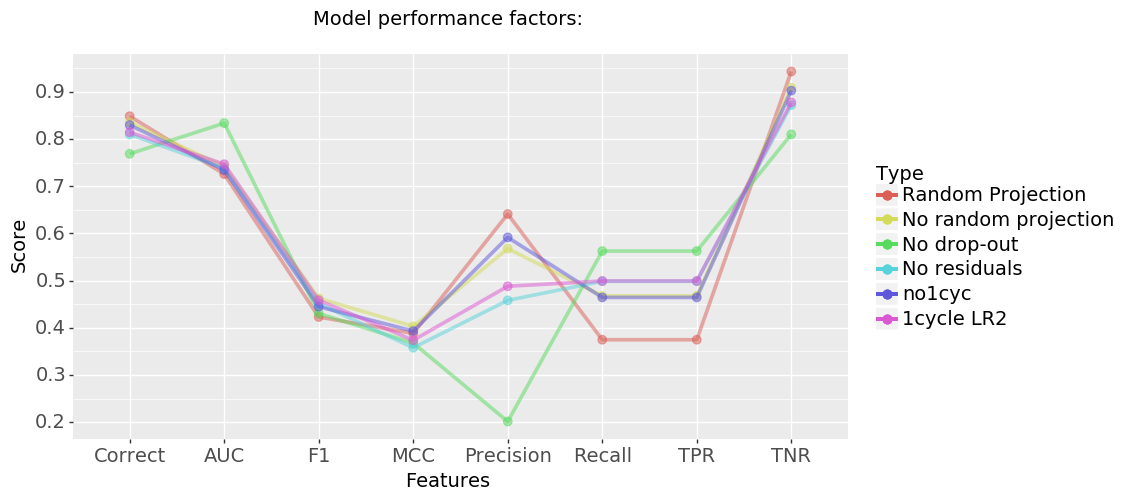

<ggplot: (-9223363250307677338)>

In [1059]:
#Compare 1-cycle, standard fit, RP unit, no residuals
comments = ["standard_RP",
            "standardMod",
            "standard_nodrop",
            "standard_nores",
           "no1c",
           "standard_lr"]

names = ["Random Projection",
           "No random projection",
           "No drop-out",
           "No residuals",
        "no1cyc",
        "1cycle LR2"]

filenames = ["CSV/CSV_Master2.csv"]*5+["CSV/CSV_Master3.csv"]
title = "Model performance factors:\n"

plot, melt_df = feature_scores_average_compare(comments, filenames, names, 5, title,
                                         expand_y = False, alpha = 0.5, return_df = True)
plot

In [1034]:
#Compare 1-cycle, standard fit, RP unit, no residuals
comments = ["standard_dp02",
            "standard_nodrop",
            "standard_dp01",
            "standard_dp03",
            "standard_dp04",
            "standard_dp05"]

names = ["dp=0.2",
    "No drop-out",
           "dp=0.1",
           "dp=0.3",
        "dp=0.4",
        "dp=0.5"]

filenames = ["CSV/CSV_Master2.csv"]*len(comments)
title = "Drop-out effect on model performance:\n"

plot, melt_df = feature_scores_average_compare(comments, filenames, names, 5, title,
                                         expand_y = False, alpha = 1, return_df = True)

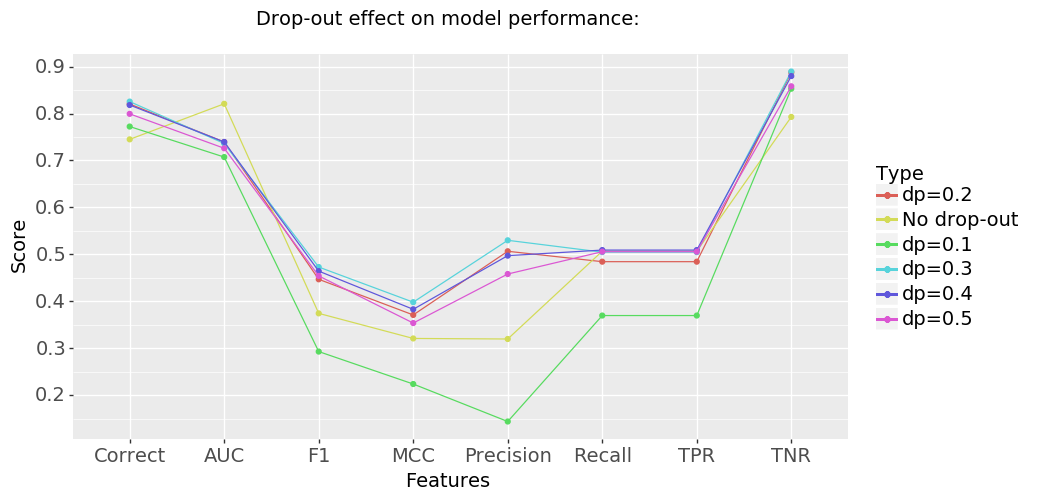

<ggplot: (8786547661383)>

In [1035]:
plot

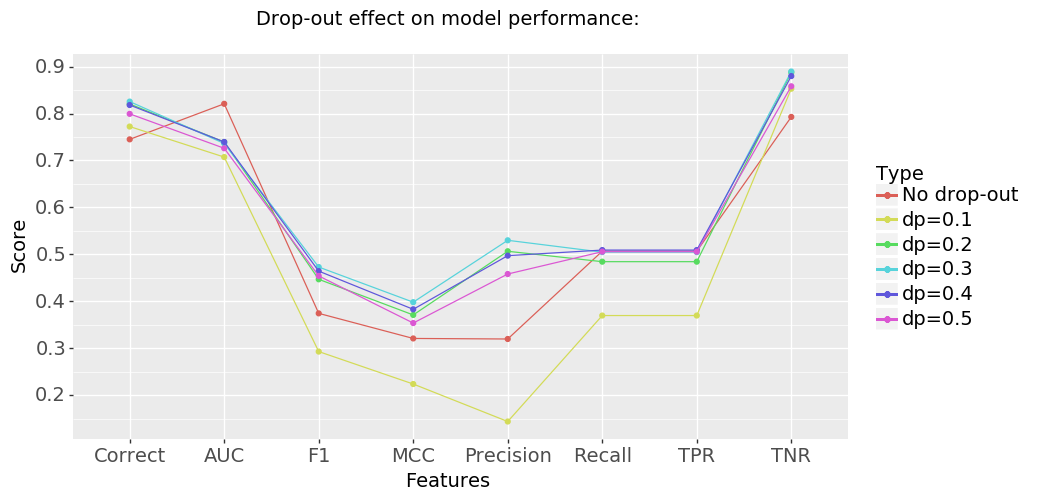

<ggplot: (-9223363250306535210)>

In [1033]:
plot

In [1040]:
df = pd.read_csv("CSV/CSV_Master3.csv")
pd.DataFrame(Counter(df["Comment"]).most_common())

,0,1
0,standard_lr2Mod:5Res:4 S:20 LR:2,25


In [1039]:
df = pd.read_csv("CSV/CSV_Master2.csv")
pd.DataFrame(Counter(df["Comment"]).most_common())

,0,1
0,5mod0Res:0 S:20,50
1,standard_nodropMod:5Res:4 S:20 dp:0,33
2,standardMod:5Res:4 S:20,25
3,7mod0Res:0 S:20,25
4,4mod0Res:0 S:20,25
5,6mod2Res:2 S:20,25
6,5mod2Res:2 S:20,25
7,7mod2Res:2 S:20,25
8,standard_no1cMod:5Res:4 no1c S:20,25
9,4mod2Res:2 S:20,25


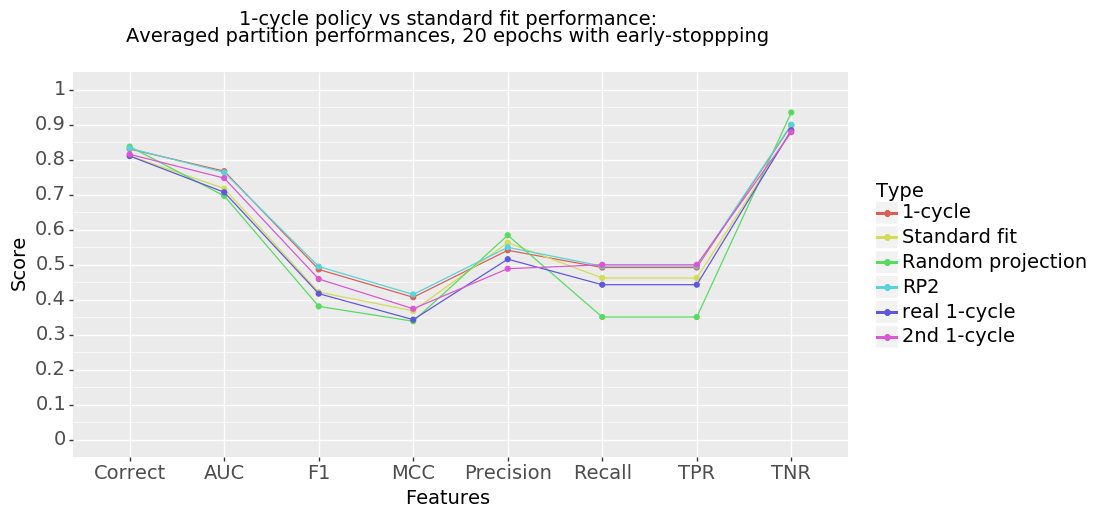

<ggplot: (-9223363250307853147)>

In [1042]:
#Compare 1-cycle, standard fit, RP unit, no residuals
comments = ["all80 S", "standard_no1c20","standard_randomprojection",
           "5mod_5resMod:5Res:3",
            "standard_lr2"]
columns = comments
filenames = (["CSV/CSV_big3.csv"] + ["CSV/CSV_Master.csv"]*2 + ["CSV/CSV_big3.csv"] + ["CSV/CSV_Master.csv"] +
             ["CSV/CSV_Master3.csv"])
title = "1-cycle policy vs standard fit performance:\nAveraged partition performances, 20 epochs with early-stoppping\n"
names = ["1-cycle", "Standard fit", "Random projection", "real 1-cycle",
        "2nd 1-cycle"]

feature_scores_average_compare(comments, filenames, names, 5, title)

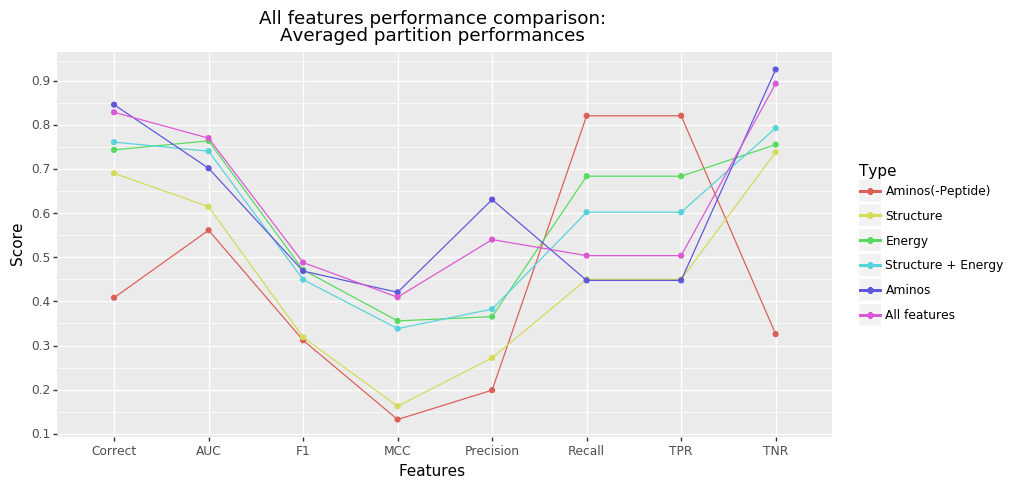

<ggplot: (8786548971128)>
[    variable    value              Type
0    Correct  0.40837  Aminos(-Peptide)
1        AUC  0.56140  Aminos(-Peptide)
2         F1  0.31187  Aminos(-Peptide)
3        MCC  0.13229  Aminos(-Peptide)
4  Precision  0.19879  Aminos(-Peptide)
5     Recall  0.82078  Aminos(-Peptide)
6        TPR  0.82078  Aminos(-Peptide)
7        TNR  0.32595  Aminos(-Peptide),     variable    value       Type
0    Correct  0.69033  Structure
1        AUC  0.61475  Structure
2         F1  0.31888  Structure
3        MCC  0.16240  Structure
4  Precision  0.27204  Structure
5     Recall  0.45000  Structure
6        TPR  0.45000  Structure
7        TNR  0.73839  Structure,     variable    value    Type
0    Correct  0.74351  Energy
1        AUC  0.76392  Energy
2         F1  0.47144  Energy
3        MCC  0.35579  Energy
4  Precision  0.36551  Energy
5     Recall  0.68384  Energy
6        TPR  0.68384  Energy
7        TNR  0.75542  Energy,     variable    value                Type
0

In [913]:
comments = ["AApep", "Struc36", "24energy",
            "Struc\+24", "AAs S", "all80 S"]
columns =  ["Aminos(-Peptide)", "Structure", "Energy",
            "Structure + Energy", "Aminos",
            "All features"]
names = columns
filenames = ["CSV/CSV_big3.csv"]*len(comments)
title = "All features performance comparison:\nAveraged partition performances"


feature_scores_average_compare(comments, filenames, names, 20, title)

In [107]:
comments = ["Struc36", "24energy",
            "Struc\+24", "AAs S",
            "all80 S", "AAenergy"]
columns =  ["Structure", "Energy",
            "Structure + Energy", "Aminos",
            "All features", "AA + 24 Energy"]
names = columns
filenames = ["CSV/CSV_big3.csv"]*4 + ["CSV/CSV_Master4.csv"] + ["CSV/CSV_big3.csv"]  + ["CSV/CSV_Master4.csv"]
title = "All features performance comparison:\nAveraged partition performances"


df = feature_scores_average_compare(comments, filenames, names, 10, title, return_df = True)

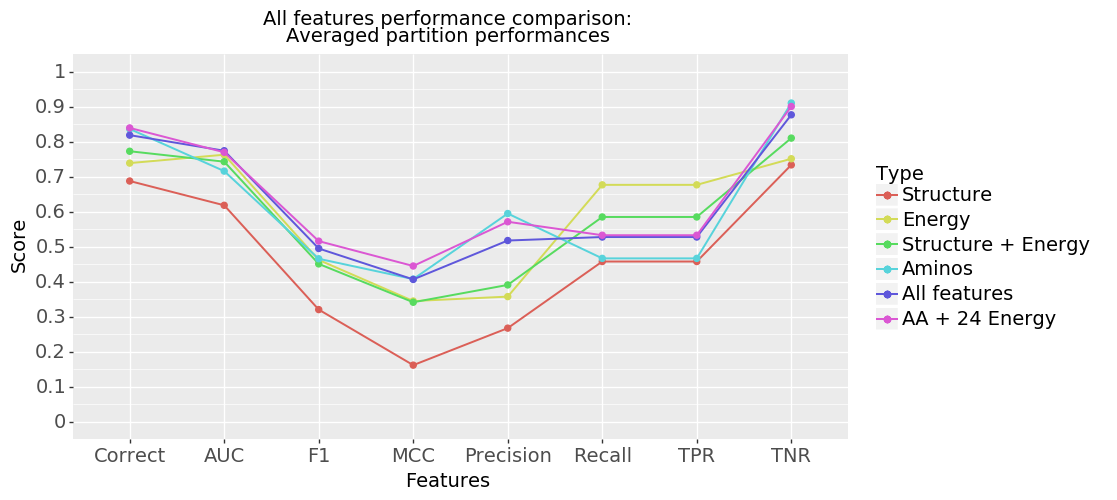

(<ggplot: (8726723611414)>, [    variable    value       Type
  0    Correct  0.68714  Structure
  1        AUC  0.61776  Structure
  2         F1  0.31976  Structure
  3        MCC  0.16106  Structure
  4  Precision  0.26680  Structure
  5     Recall  0.45710  Structure
  6        TPR  0.45710  Structure
  7        TNR  0.73318  Structure,     variable    value    Type
  0    Correct  0.73834  Energy
  1        AUC  0.76230  Energy
  2         F1  0.46164  Energy
  3        MCC  0.34426  Energy
  4  Precision  0.35684  Energy
  5     Recall  0.67618  Energy
  6        TPR  0.67618  Energy
  7        TNR  0.75076  Energy,     variable    value                Type
  0    Correct  0.77220  Structure + Energy
  1        AUC  0.74240  Structure + Energy
  2         F1  0.45032  Structure + Energy
  3        MCC  0.34076  Structure + Energy
  4  Precision  0.39026  Structure + Energy
  5     Recall  0.58440  Structure + Energy
  6        TPR  0.58440  Structure + Energy
  7        TNR  0.80

In [108]:
df

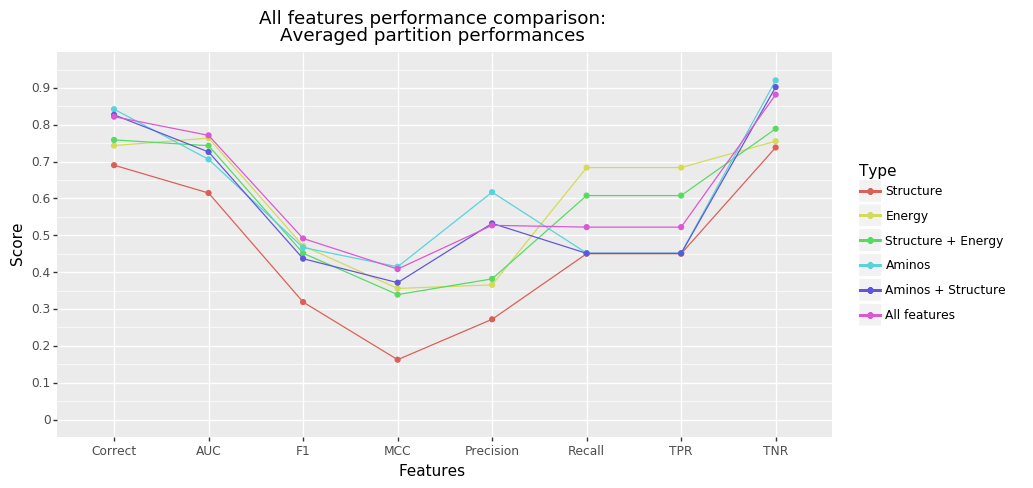

<ggplot: (8786552500039)>


In [929]:
comments = ["Struc36", "24energy",
            "Struc\+24", "AAs S", "all56 S", "all80 S"]
columns =  ["Structure", "Energy",
            "Structure + Energy", "Aminos", "Aminos + Structure",
            "All features"]
names = columns
filenames = ["CSV/CSV_big3.csv"]*len(comments)
title = "All features performance comparison:\nAveraged partition performances"


feature_scores_average_compare(comments, filenames, names, 20, title,
                              expand_y = [0, 0.95])

In [ ]:
#Compare 1-cycle, standard fit, RP unit, no residuals
comments = ["all80 S", "standard_no1c20","standard_randomprojection",
           "all80rpunit", "5mod_5resMod:5Res:3"]
columns = comments
filenames = ["CSV/CSV_big3.csv"] + ["CSV/CSV_Master.csv"]*2 + ["CSV/CSV_big3.csv"] + ["CSV/CSV_Master.csv"]
title = "1-cycle policy vs standard fit performance:\nAveraged partition performances, 20 epochs with early-stoppping\n"
names = ["1-cycle", "Standard fit", "Random projection", "RP2", "real 1-cycle"]

feature_scores_average_compare(comments, filenames, names, 5, title)

In [892]:
df = pd.read_csv("CSV/CSV_big3.csv")
pd.DataFrame(Counter(df["Comment"]).most_common())

,0,1
0,all56 S:20 X:0_56,200
1,AAs S:20 X:0_20,195
2,all80 S:20 X:0_80,120
3,Struc+24E S:20 X:20_80,120
4,all80rpunit S:20 X:0_80,100
5,24energy S:20 X:56_80,100
6,Struc36 S:20 X:20_56,100
7,AApep S:20 X:0_20 M:181_192,100
8,Test S:1,35
9,all80 unitrp S:20 X:0_80,8


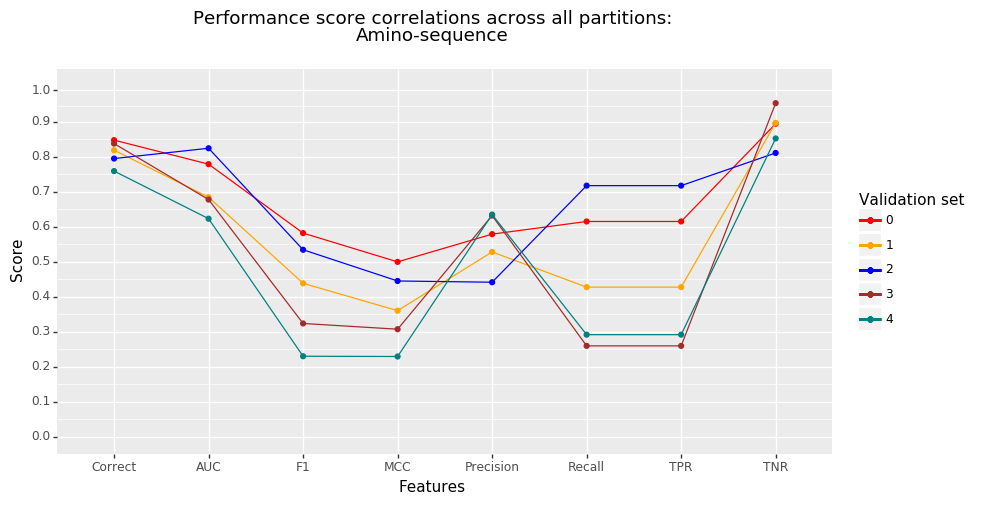

<ggplot: (8786548945342)>
              0     1     2     3     4
Correct    0.85  0.82  0.79  0.84  0.76
AUC        0.78  0.68  0.82  0.68  0.62
F1         0.58  0.44  0.53  0.32  0.23
MCC        0.50  0.36  0.44  0.31  0.23
Precision  0.58  0.53  0.44  0.63  0.63
Recall     0.61  0.43  0.72  0.26  0.29
TPR        0.61  0.43  0.72  0.26  0.29
TNR        0.89  0.90  0.81  0.95  0.85


In [798]:
#score = ["MCC"]
comments = ["standard_no1c20"]*8
columns = comments
filenames = ["CSV/CSV_Master.csv"]*8
title = "Performance score correlations across all partitions:\nAmino-sequence\n"

feature_scores(comments, filenames, 5, title)

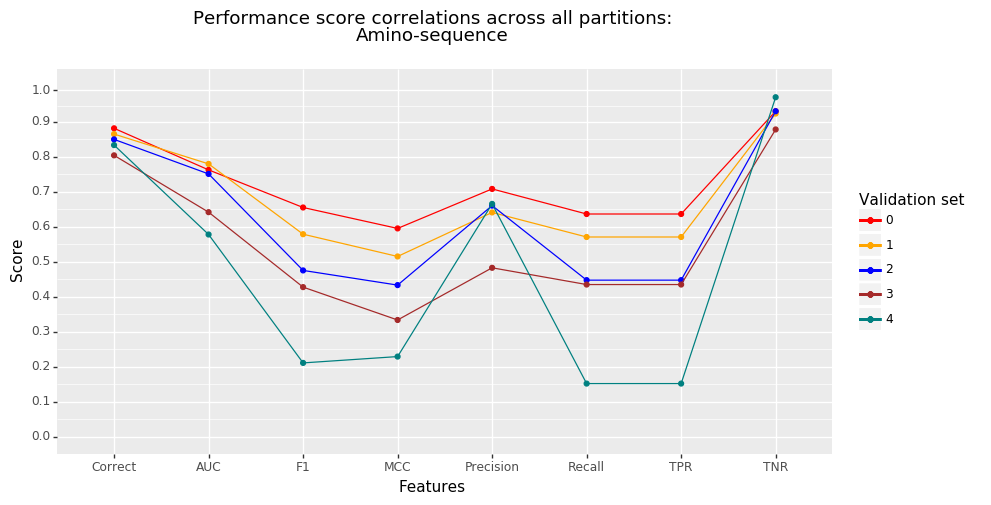

<ggplot: (-9223363250305839146)>
              0     1     2     3     4
Correct    0.88  0.86  0.85  0.80  0.83
AUC        0.76  0.78  0.75  0.64  0.58
F1         0.65  0.58  0.47  0.43  0.21
MCC        0.59  0.51  0.43  0.33  0.23
Precision  0.71  0.64  0.66  0.48  0.66
Recall     0.64  0.57  0.45  0.43  0.15
TPR        0.64  0.57  0.45  0.43  0.15
TNR        0.93  0.92  0.93  0.88  0.97


In [1065]:
#score = ["MCC"]
comments = ["AAs S"]*8
columns = comments
filenames = ["CSV/CSV_big3.csv"]*8
title = "Performance score correlations across all partitions:\nAmino-sequence\n"


feature_scores(comments, filenames, 20, title)

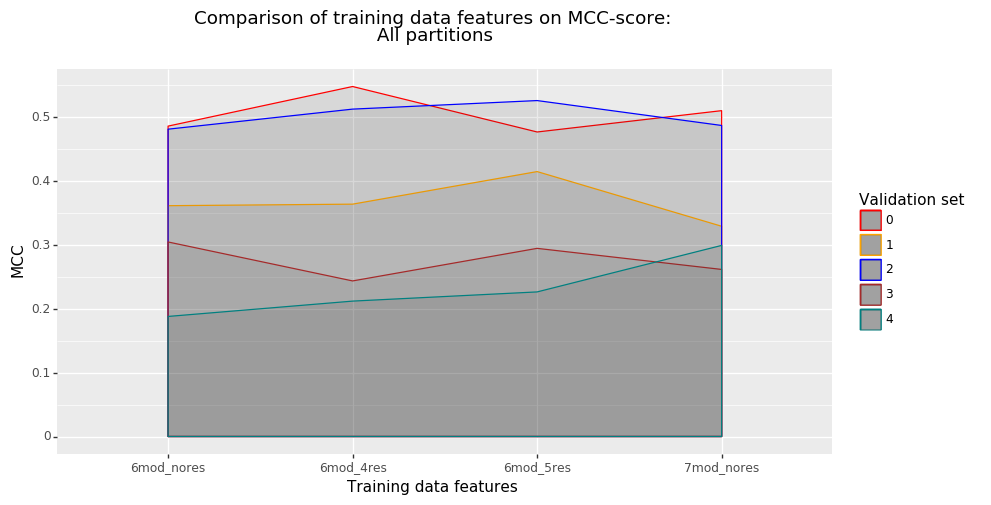

<ggplot: (8786547965448)>


In [764]:
score = ["MCC"]
comments = ["6mod_nores", "6mod_4res", "6mod_5res", "7mod_nores"] 
columns = comments
filenames = ["CSV/CSV_Master.csv"]*len(comments)
title = "Comparison of training data features on MCC-score:\n All partitions\n"
validation_set_ggplot(score, comments, columns, filenames, 5, title)

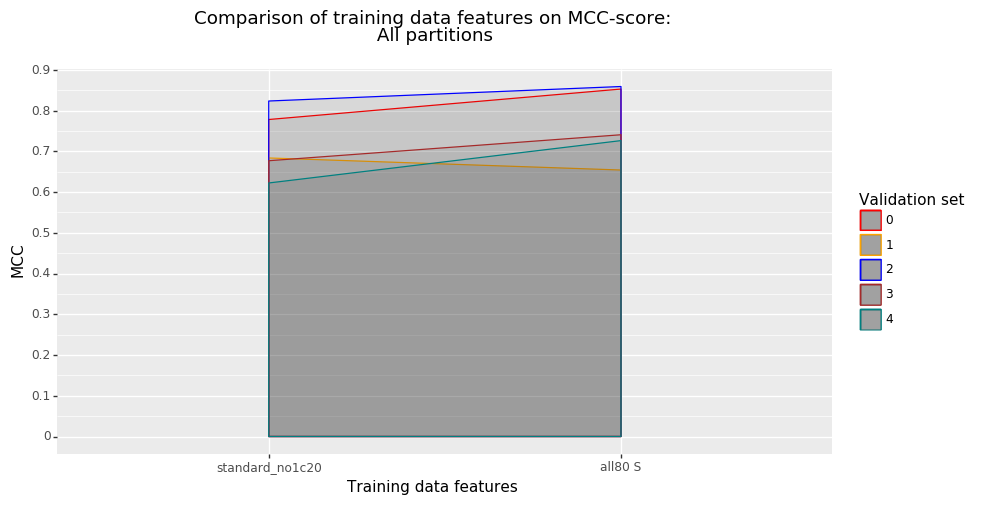

<ggplot: (8786547480447)>


In [786]:
score = ["AUC"]
comments = ["standard_no1c20", "all80 S"]
columns = comments
filenames = ["CSV/CSV_Master.csv"]*1+["CSV/CSV_big3.csv"]
validation_set_ggplot(score, comments, columns, filenames, 5, title)

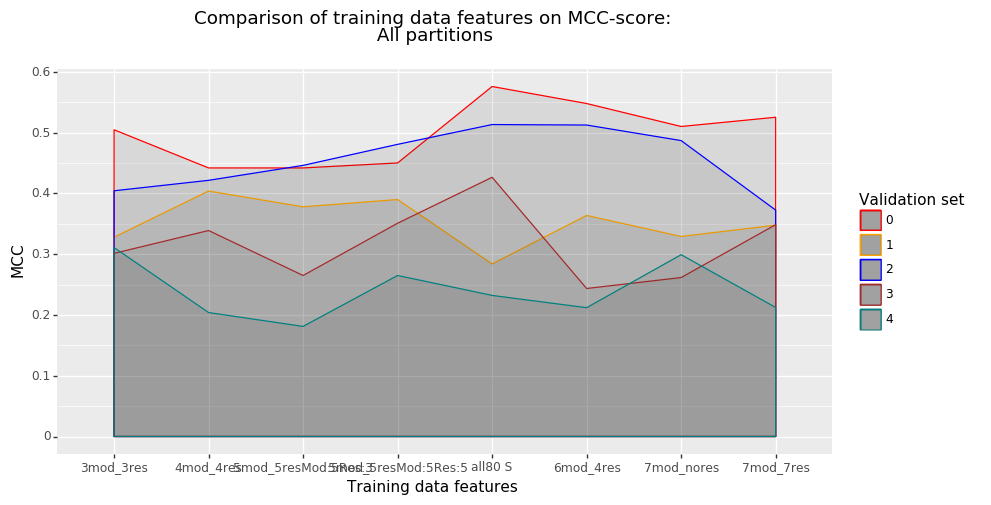

<ggplot: (-9223363250307664682)>


In [769]:
score = ["MCC"]
comments = ["3mod_3res", "4mod_4res", "5mod_5resMod:5Res:3", "5mod_5resMod:5Res:5",
            "all80 S", "6mod_4res", "7mod_nores", "7mod_7res"] 
columns = comments
filenames = ["CSV/CSV_Master.csv"]*4+["CSV/CSV_big3.csv"]+["CSV/CSV_Master.csv"]*3
title = "Comparison of training data features on MCC-score:\n All partitions\n"
validation_set_ggplot(score, comments, columns, filenames, 5, title)

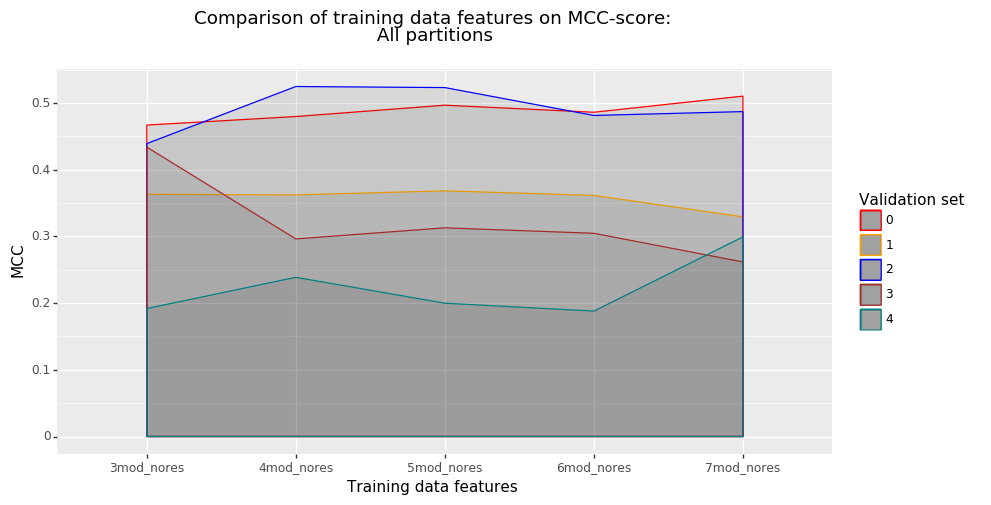

<ggplot: (-9223363250306493019)>


In [722]:
score = ["MCC"]

comments = ["3mod_nores", "4mod_nores", "5mod_nores",
            "6mod_nores", "7mod_nores"] 
columns = comments
filenames = ["CSV/CSV_Master.csv"]*len(comments)
title = "Comparison of training data features on MCC-score:\n All partitions\n"

validation_set_ggplot(score, comments, columns, filenames, title)

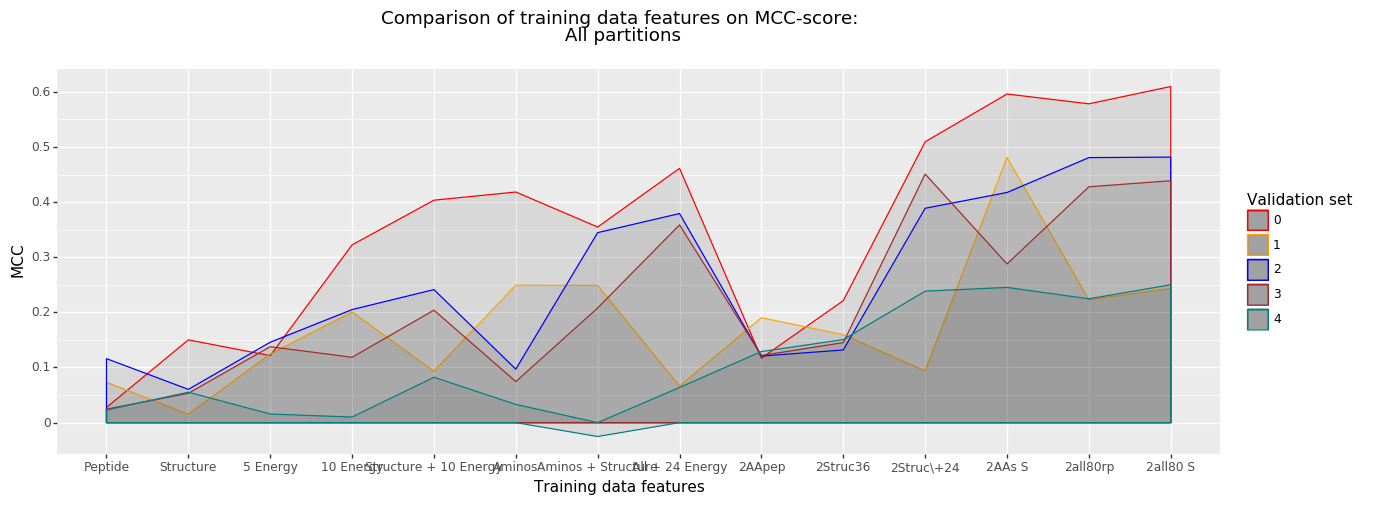

<ggplot: (-9223363250303558954)>


In [486]:
dfs = []
dfs2 = []
for i in range(0,5):
    #score = ["Correct", "AUC", "F1", "MCC", "Prec", "Rec", "TPR", "TNR"]
    score = ["MCC"]
    
    comments = ["AApep S", "8Struc36", "only5energy", "only10energy", "struc\+10",  "AAs",
               "all56 S",
                "6s80dp0\.30"] + ["AApep", "Struc36", "Struc\+24", "AAs S", "all80rp", "all80 S"]
    columns = ["Peptide", "Structure", "5 Energy", "10 Energy", "Structure + 10 Energy",  "Aminos",
               "Aminos + Structure",
                "All + 24 Energy"] + ["2AApep", "2Struc36", "2Struc\+24", "2AAs S", "2all80rp", "2all80 S"]
    filenames = ["CSV/aa2.csv", "CSV/8struc.csv", "CSV/9sets.csv", "CSV/9sets.csv", "CSV/9sets.csv", "CSV/aa2.csv",
                "CSV/CSV_big.csv", "CSV_big2.csv"]+["CSV/CSV_big3.csv"]*6


    #columns = list(map(str, list(range(0,20))[0:len(filenames)]))
    df = feature_extract3(score = len(filenames)*score,
                         filenames = filenames,
                         comments = comments, partitions = [i],
                         length = 15)
    #df.columns = comments
    df.columns = columns
    
    df2 = df.copy() #keep track of variation
    df = pd.DataFrame(df.apply(np.average)).transpose() #Average
    
    melt_df = pd.melt(df.copy())
    melt_df["variable"] = pd.Categorical(melt_df["variable"], categories = df.columns, ordered=True)
    melt_df2 = pd.melt(df2.copy())
    melt_df2["variable"] = pd.Categorical(melt_df2["variable"], categories = df.columns, ordered=True)
    
    #Append
    melt_df["Validation set"] = pd.DataFrame([str(i)]*len(melt_df)) #Type for color
    melt_df2["Validation set"] = pd.DataFrame([str(i)]*len(melt_df2)) #Type for color

    dfs.append(melt_df)
    dfs2.append(melt_df2)
#Append

title = "Comparison of training data features on MCC-score:\n All partitions\n"

print((ggplot(melt_df, aes("variable", "value", group = 0)) #Group together averages
    + geom_area(aes(colour = "Validation set"), data = dfs[0], alpha = 0.1)
     + geom_area(aes(colour = "Validation set"), data = dfs[1], alpha = 0.1)
     + geom_area(aes(colour = "Validation set"), data = dfs[2], alpha = 0.1)
     + geom_area(aes(colour = "Validation set"), data = dfs[3], alpha = 0.1)
     + geom_area(aes(colour = "Validation set"), data = dfs[4], alpha = 0.1)
    + ylab("MCC")
    + xlab("Training data features")
    + scale_y_continuous(breaks = [0.0, 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

    + ggtitle(title)
    + theme(figure_size =(15,5))
    + scale_color_manual(["red", "orange", "blue", "brown", "teal"])
))


[    variable     value Validation set
 0      AApep  0.580857              0
 1    Struc36  0.678714              0
 2  Struc\+24  0.875857              0
 3      AAs S  0.779571              0
 4    all80rp  0.857571              0
 5    all80 S  0.877429              0,     variable     value Validation set
 0      AApep  0.578000              1
 1    Struc36  0.626857              1
 2  Struc\+24  0.509000              1
 3      AAs S  0.790714              1
 4    all80rp  0.628429              1
 5    all80 S  0.666857              1,     variable     value Validation set
 0      AApep  0.548714              2
 1    Struc36  0.599714              2
 2  Struc\+24  0.797000              2
 3      AAs S  0.825000              2
 4    all80rp  0.858286              2
 5    all80 S  0.842286              2,     variable     value Validation set
 0      AApep  0.571714              3
 1    Struc36  0.595714              3
 2  Struc\+24  0.846286              3
 3      AAs S  0.656857  

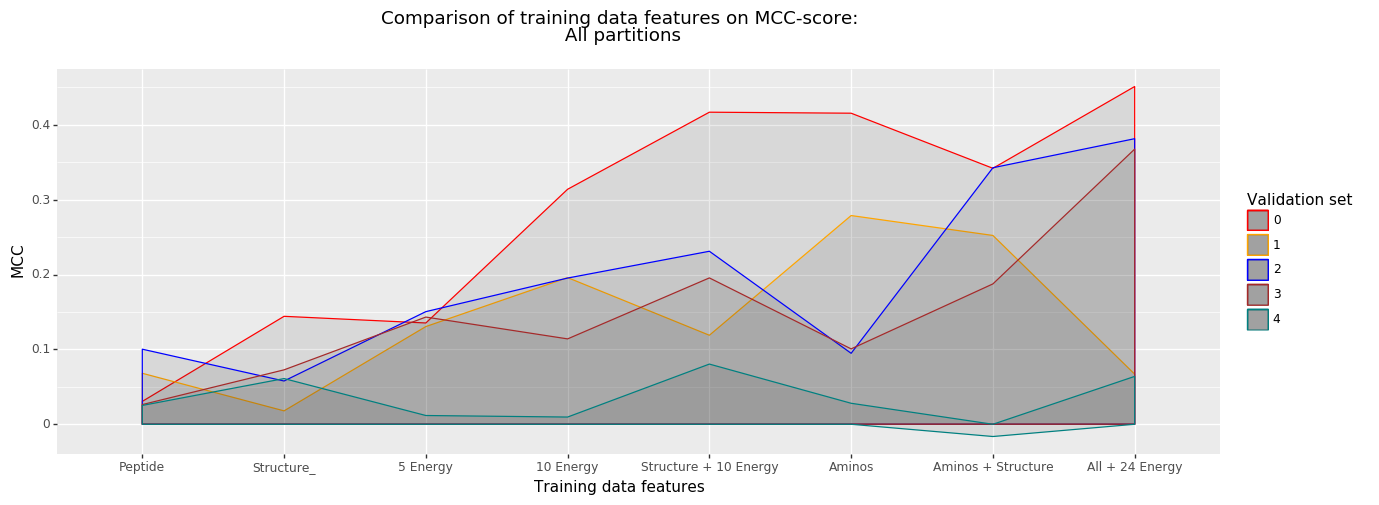

<ggplot: (-9223363310113913351)>


In [17]:
dfs = []
dfs2 = []
for i in range(0,5):
    score = ["Correct", "AUC", "F1", "MCC", "Prec", "Rec", "TPR", "TNR"]
    score = ["MCC"]
    
    filenames = ["CSV/aa2.csv", "CSV/8struc.csv", "CSV/9sets.csv", "CSV/9sets.csv", "CSV/9sets.csv", "CSV/aa2.csv",
                 "CSV/CSV_big.csv",
                 "CSV_big2.csv"
                ]
    comments = ["AApep S", "8Struc36", "only5energy", "only10energy", "struc\+10",  "AAs",
               "all56 S",
                "6s80dp0\.30"
               ]
    columns = ["Peptide", "Structure_", "5 Energy", "10 Energy", "Structure + 10 Energy",  "Aminos",
               "Aminos + Structure",
                "All + 24 Energy"]


    #columns = list(map(str, list(range(0,20))[0:len(filenames)]))
    df = feature_extract2(score = len(filenames)*score,
                         filenames = filenames,
                         comments = comments, partitions = [i])
    #df.columns = comments
    df.columns = columns
    
    df2 = df.copy() #keep track of variation
    df = pd.DataFrame(df.apply(np.average)).transpose() #Average
    
    melt_df = pd.melt(df.copy())
    melt_df["variable"] = pd.Categorical(melt_df["variable"], categories = df.columns, ordered=True)
    melt_df2 = pd.melt(df2.copy())
    melt_df2["variable"] = pd.Categorical(melt_df2["variable"], categories = df.columns, ordered=True)
    
    #Append
    melt_df["Validation set"] = pd.DataFrame([str(i)]*len(melt_df)) #Type for color
    melt_df2["Validation set"] = pd.DataFrame([str(i)]*len(melt_df2)) #Type for color

    dfs.append(melt_df)
    dfs2.append(melt_df2)
#Append

title = "Comparison of training data features on MCC-score:\n All partitions\n"

print((ggplot(melt_df, aes("variable", "value", group = 0)) #Group together averages
    + geom_area(aes(colour = "Validation set"), data = dfs[0],  alpha = 0.1)
     + geom_area(aes(colour = "Validation set"), data = dfs[1], alpha = 0.1)
     + geom_area(aes(colour = "Validation set"), data = dfs[2], alpha = 0.1)
     + geom_area(aes(colour = "Validation set"), data = dfs[3], alpha = 0.1)
     + geom_area(aes(colour = "Validation set"), data = dfs[4], alpha = 0.1)
    + ylab("MCC")
    + xlab("Training data features")
    + ggtitle(title)
    + theme(figure_size =(15,5))
    + scale_color_manual(["red", "orange", "blue", "brown", "teal"])
))


#### Ubergrrr

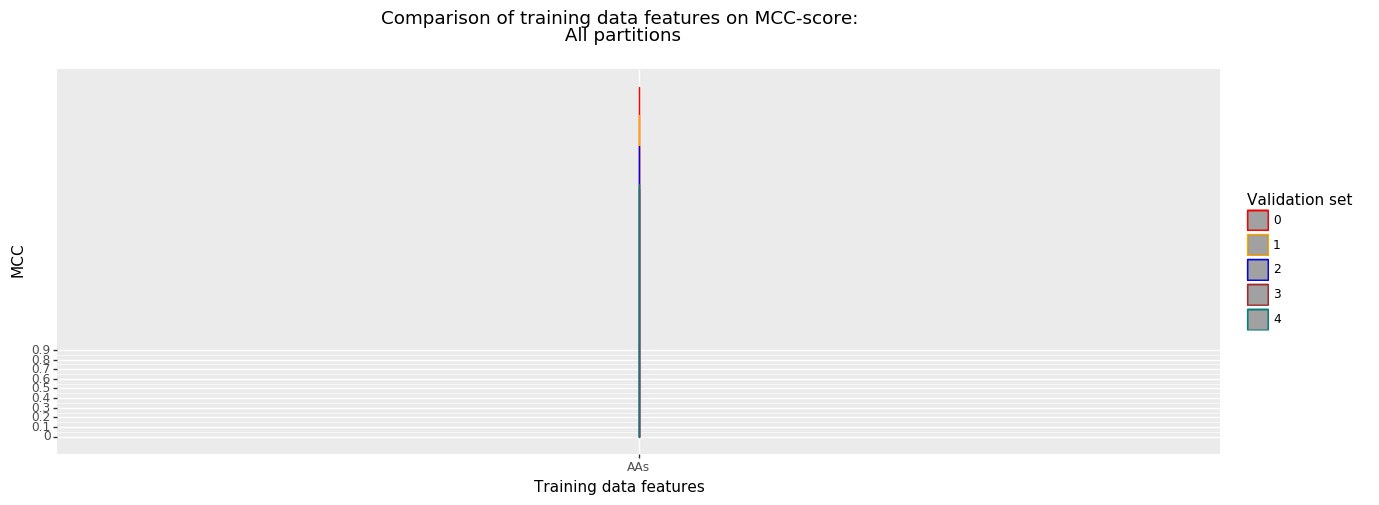

<ggplot: (8786552158023)>


In [567]:
dfs = []
dfs2 = []
for i in range(0,5):
    score = ["Correct", "AUC", "F1", "MCC", "Prec", "Rec", "TPR", "TNR"]
    #score = ["MCC"]
    
    comments = ["AAs", "AAs", "AAs", "AAs", "AAs"]
    columns = ["Correct", "AUC", "F1", "MCC", "Prec", "Rec", "TPR", "TNR"]
    filenames = ["CSV/CSV_big3.csv"]*len(comments)


    #columns = list(map(str, list(range(0,20))[0:len(filenames)]))
    df = feature_extract3(score = len(filenames)*score,
                         filenames = filenames,
                         comments = comments, partitions = [i],
                         length = 20)
    #df.columns = comments
    #df.columns = columns[i]
    
    df2 = df.copy() #keep track of variation
    df = pd.DataFrame(df.apply(np.average)).transpose() #Average
    
    melt_df = pd.melt(df.copy())
    melt_df["variable"] = pd.Categorical(melt_df["variable"], categories = df.columns, ordered=True)
    melt_df2 = pd.melt(df2.copy())
    melt_df2["variable"] = pd.Categorical(melt_df2["variable"], categories = df.columns, ordered=True)
    
    #Append
    melt_df["Validation set"] = pd.DataFrame([str(i)]*len(melt_df)) #Type for color
    melt_df2["Validation set"] = pd.DataFrame([str(i)]*len(melt_df2)) #Type for color

    dfs.append(melt_df)
    dfs2.append(melt_df2)
#Append

title = "Comparison of training data features on MCC-score:\n All partitions\n"

print((ggplot(melt_df, aes("variable", "value", group = 0)) #Group together averages
    + geom_area(aes(colour = "Validation set"), data = dfs[0], alpha = 0.1)
     + geom_area(aes(colour = "Validation set"), data = dfs[1], alpha = 0.1)
     + geom_area(aes(colour = "Validation set"), data = dfs[2], alpha = 0.1)
     + geom_area(aes(colour = "Validation set"), data = dfs[3], alpha = 0.1)
     + geom_area(aes(colour = "Validation set"), data = dfs[4], alpha = 0.1)
    + scale_y_continuous(breaks = [0.0, 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

    + ylab("MCC")
    + xlab("Training data features")
    + ggtitle(title)
    + theme(figure_size =(15,5))
    + scale_color_manual(["red", "orange", "blue", "brown", "teal"])
))


In [95]:
from collections import Counter

filenames = ["CSV/CSV_Master.csv,"]

for i in range(len(filenames)):
    df = pd.read_csv(filenames[i])
    print(filenames[i])
    print(pd.DataFrame(Counter(df["Comment"]).most_common()))

CSV/CSV_Master.csv,
                                            0    1
0               AAenergy S:20 X:0_21 X3:56_80  100
1  peptideonly S:20 X:0_21 M:0_181 M2:192_468   57


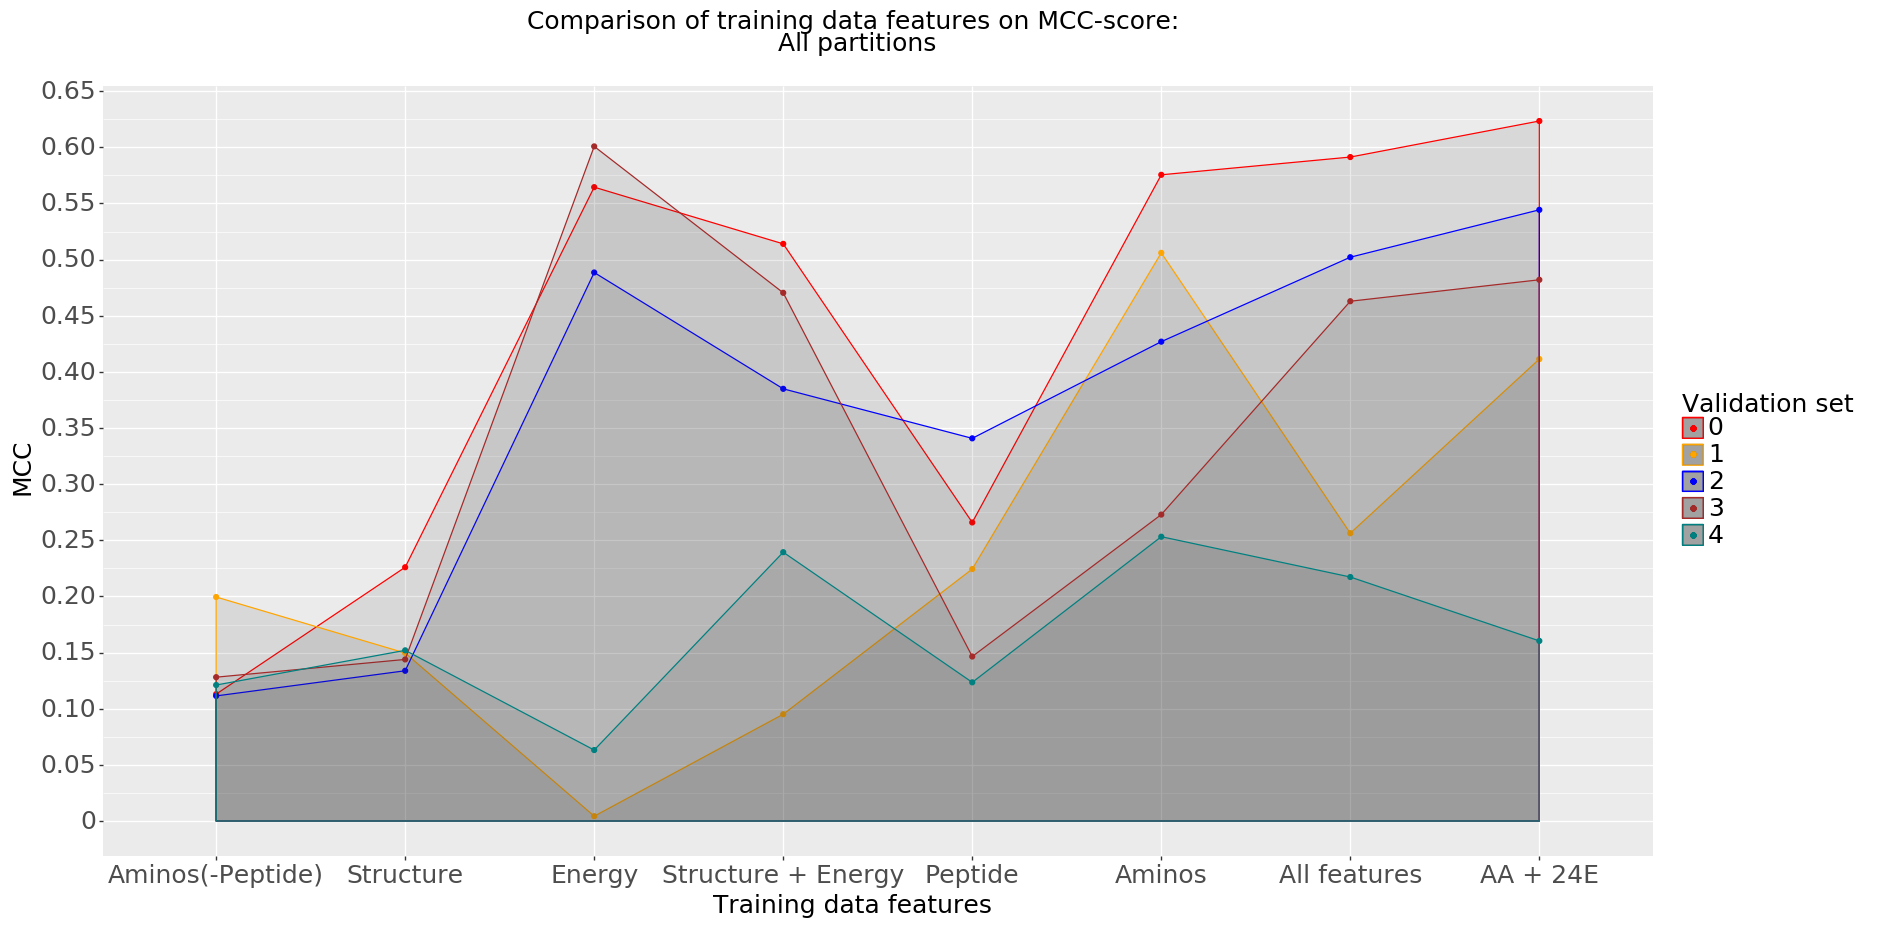

<ggplot: (8726723512840)>


In [100]:
dfs = []
dfs2 = []
for i in range(0,5):
    #score = ["Correct", "AUC", "F1", "MCC", "Prec", "Rec", "TPR", "TNR"]
    score = ["MCC"]
    
    comments = ["AApep", "Struc36", "24energy",
                "Struc\+24", "peptideonly", "AAs S",
                "all80 S", "AAenergy"]
    columns =  ["Aminos(-Peptide)", "Structure", "Energy",
                "Structure + Energy", "Peptide", "Aminos",
                "All features", "AA + 24E"]
    filenames = ["CSV/CSV_big3.csv"]*4 + ["CSV/CSV_Master4.csv"] +["CSV/CSV_big3.csv"]*2+["CSV/CSV_Master4.csv"]


    #columns = list(map(str, list(range(0,20))[0:len(filenames)]))
    df = feature_extract3(score = len(filenames)*score,
                         filenames = filenames,
                         comments = comments, partitions = [i],
                         length = 10)
    #df.columns = comments
    df.columns = columns
    
    df2 = df.copy() #keep track of variation
    df = pd.DataFrame(df.apply(np.average)).transpose() #Average
    
    melt_df = pd.melt(df.copy())
    melt_df["variable"] = pd.Categorical(melt_df["variable"], categories = df.columns, ordered=True)
    melt_df2 = pd.melt(df2.copy())
    melt_df2["variable"] = pd.Categorical(melt_df2["variable"], categories = df.columns, ordered=True)
    
    #Append
    melt_df["Validation set"] = pd.DataFrame([str(i)]*len(melt_df)) #Type for color
    melt_df2["Validation set"] = pd.DataFrame([str(i)]*len(melt_df2)) #Type for color

    dfs.append(melt_df)
    dfs2.append(melt_df2)
#Append

title = "Comparison of training data features on MCC-score:\n All partitions\n"

print((ggplot(melt_df, aes("variable", "value", group = 0)) #Group together averages
    + geom_area(aes(colour = "Validation set"), data = dfs[0], alpha = 0.1)
       + geom_point(aes(colour = "Validation set"),data = dfs[0])
     + geom_area(aes(colour = "Validation set"), data = dfs[1], alpha = 0.1)
       + geom_point(aes(colour = "Validation set"),data = dfs[1])
     + geom_area(aes(colour = "Validation set"), data = dfs[2], alpha = 0.1)
       + geom_point(aes(colour = "Validation set"),data = dfs[2])
     + geom_area(aes(colour = "Validation set"), data = dfs[3], alpha = 0.1)
       + geom_point(aes(colour = "Validation set"),data = dfs[3])
     + geom_area(aes(colour = "Validation set"), data = dfs[4], alpha = 0.1)
    + geom_point(aes(colour = "Validation set"),data = dfs[4])
    + scale_y_continuous(breaks = [0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,
                                   0.5,0.55,0.6,0.65,0.7])
    + ylab("MCC")
    + xlab("Training data features")
    + ggtitle(title)
    + theme(axis_text_x=element_text(size = 6))
    #+ element_text(size = 18)
    + theme(figure_size =(20,10), text = element_text(size = 18))
    + scale_color_manual(["red", "orange", "blue", "brown", "teal"])
))


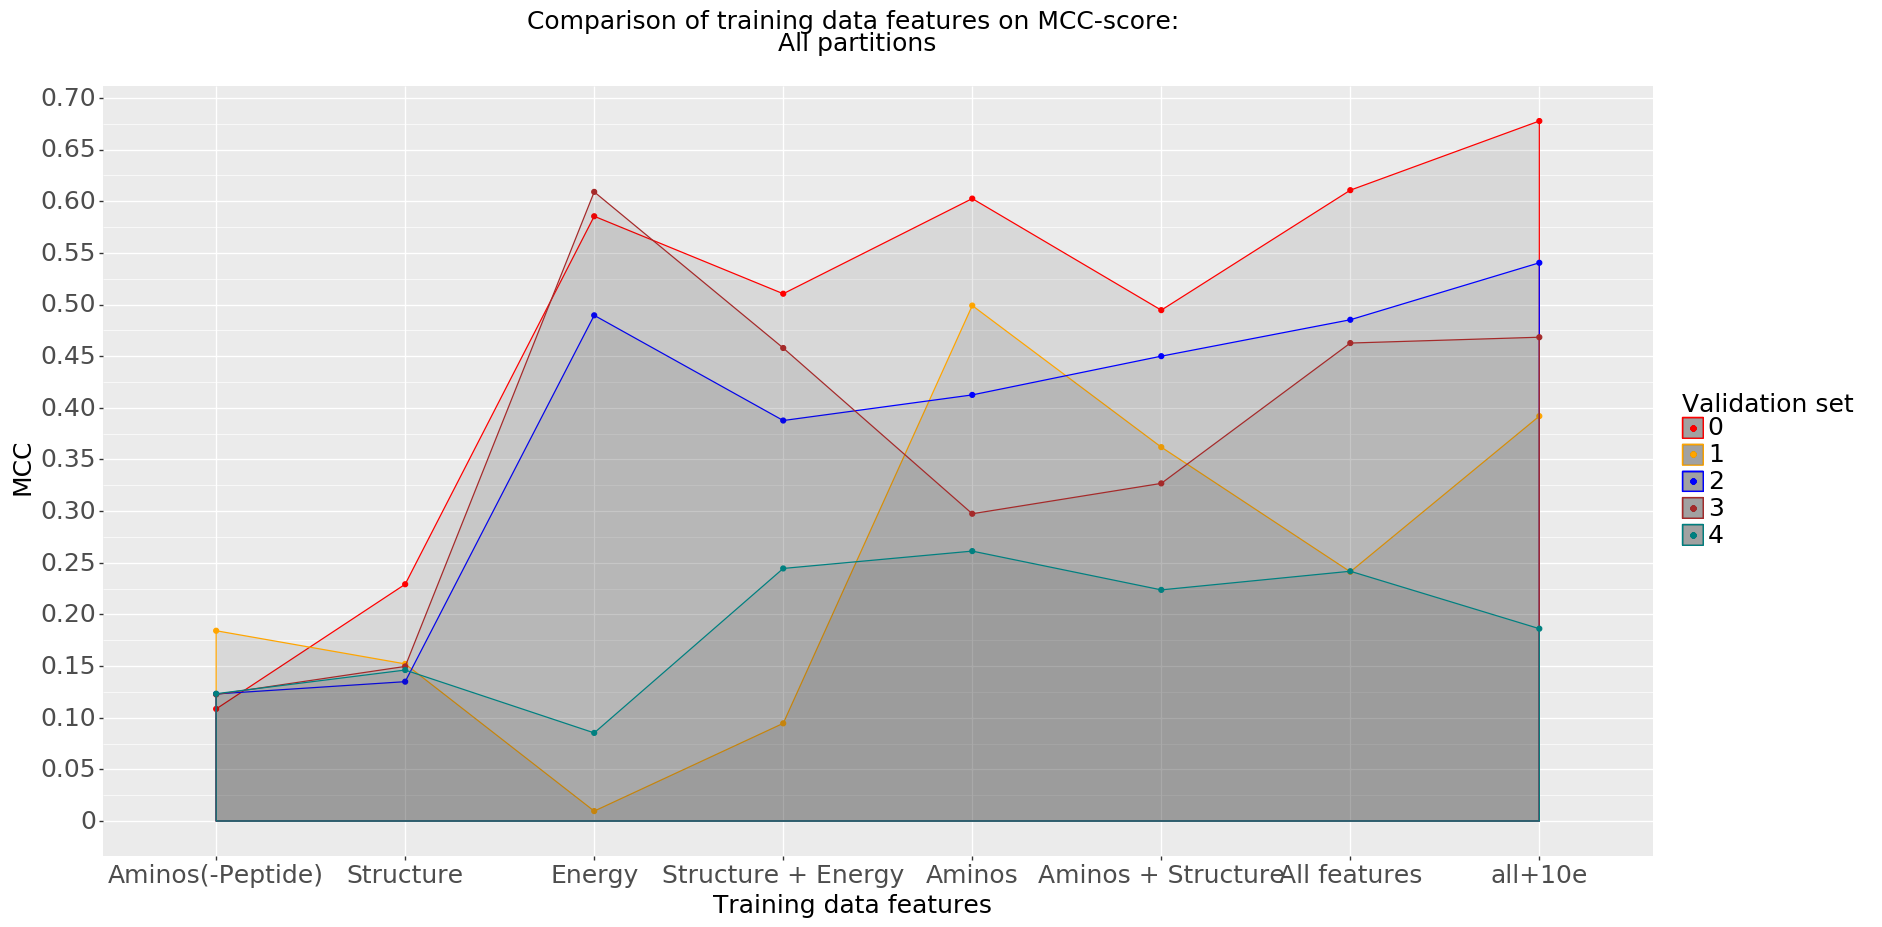

<ggplot: (-9223363310133252117)>


In [97]:
dfs = []
dfs2 = []
for i in range(0,5):
    #score = ["Correct", "AUC", "F1", "MCC", "Prec", "Rec", "TPR", "TNR"]
    score = ["MCC"]
    
    comments = ["AApep", "Struc36", "24energy",
                "Struc\+24", "AAs S", "all56 S",
                "all80 S", "AAenergy"]
    columns =  ["Aminos(-Peptide)", "Structure", "Energy",
                "Structure + Energy", "Aminos", "Aminos + Structure",
                "All features", "all+10e"]
    filenames = ["CSV/CSV_big3.csv"]*4 + ["CSV/CSV_big3.csv"]*3+["CSV/CSV_Master4.csv"]


    #columns = list(map(str, list(range(0,20))[0:len(filenames)]))
    df = feature_extract3(score = len(filenames)*score,
                         filenames = filenames,
                         comments = comments, partitions = [i],
                         length = 20)
    #df.columns = comments
    df.columns = columns
    
    df2 = df.copy() #keep track of variation
    df = pd.DataFrame(df.apply(np.average)).transpose() #Average
    
    melt_df = pd.melt(df.copy())
    melt_df["variable"] = pd.Categorical(melt_df["variable"], categories = df.columns, ordered=True)
    melt_df2 = pd.melt(df2.copy())
    melt_df2["variable"] = pd.Categorical(melt_df2["variable"], categories = df.columns, ordered=True)
    
    #Append
    melt_df["Validation set"] = pd.DataFrame([str(i)]*len(melt_df)) #Type for color
    melt_df2["Validation set"] = pd.DataFrame([str(i)]*len(melt_df2)) #Type for color

    dfs.append(melt_df)
    dfs2.append(melt_df2)
#Append

title = "Comparison of training data features on MCC-score:\n All partitions\n"

print((ggplot(melt_df, aes("variable", "value", group = 0)) #Group together averages
    + geom_area(aes(colour = "Validation set"), data = dfs[0], alpha = 0.1)
       + geom_point(aes(colour = "Validation set"),data = dfs[0])
     + geom_area(aes(colour = "Validation set"), data = dfs[1], alpha = 0.1)
       + geom_point(aes(colour = "Validation set"),data = dfs[1])
     + geom_area(aes(colour = "Validation set"), data = dfs[2], alpha = 0.1)
       + geom_point(aes(colour = "Validation set"),data = dfs[2])
     + geom_area(aes(colour = "Validation set"), data = dfs[3], alpha = 0.1)
       + geom_point(aes(colour = "Validation set"),data = dfs[3])
     + geom_area(aes(colour = "Validation set"), data = dfs[4], alpha = 0.1)
    + geom_point(aes(colour = "Validation set"),data = dfs[4])
    + scale_y_continuous(breaks = [0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,
                                   0.5,0.55,0.6,0.65,0.7])
    + ylab("MCC")
    + xlab("Training data features")
    + ggtitle(title)
    + theme(axis_text_x=element_text(size = 6))
    #+ element_text(size = 18)
    + theme(figure_size =(20,10), text = element_text(size = 18))
    + scale_color_manual(["red", "orange", "blue", "brown", "teal"])
))


In [21]:
from collections import Counter
df = pd.read_csv("CSV/CSV_big3.csv")
pd.DataFrame(Counter(df["Comment"]).most_common())

,0,1
0,all56 S:20 X:0_56,200
1,AAs S:20 X:0_20,195
2,all80 S:20 X:0_80,120
3,Struc+24E S:20 X:20_80,120
4,all80rpunit S:20 X:0_80,100
5,24energy S:20 X:56_80,100
6,Struc36 S:20 X:20_56,100
7,AApep S:20 X:0_20 M:181_192,100
8,Test S:1,35
9,all80 unitrp S:20 X:0_80,8


In [55]:
from collections import Counter
df = pd.read_csv("CSV/CSV_FF.csv")
pd.DataFrame(Counter(df["Comment"]).most_common())

,0,1
0,blosum,10
1,AAsRes:3 S:20,5
2,blosumRes:3 S:20,5
3,3blosumRes:3 S:20,5
4,2AAsRes:3 S:20,5


In [58]:
df[df["Comment"].str.contains("2AAs")].describe()

,Test,Validation,Correct,AUC,MCC,F1,AVP,TPR,TNR,Prec,Rec,Duration (s)
count,5.0,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000
mean,0.0,2.000000,0.750600,0.62080,0.112200,0.251600,0.267800,0.288200,0.843000,0.23900,0.288200,355.600000
std,0.0,1.581139,0.058875,0.14336,0.232888,0.207445,0.187196,0.274778,0.061474,0.15784,0.274778,189.581908
min,0.0,0.000000,0.697000,0.53100,-0.095000,0.069000,0.166000,0.062000,0.764000,0.07700,0.062000,115.000000
25%,0.0,1.000000,0.712000,0.55300,0.007000,0.127000,0.183000,0.091000,0.815000,0.17200,0.091000,236.000000
50%,0.0,2.000000,0.719000,0.56100,0.033000,0.182000,0.190000,0.192000,0.850000,0.21100,0.192000,356.000000
75%,0.0,3.000000,0.792000,0.58400,0.108000,0.286000,0.198000,0.364000,0.854000,0.23500,0.364000,477.000000
max,0.0,4.000000,0.833000,0.87500,0.508000,0.594000,0.602000,0.732000,0.932000,0.50000,0.732000,594.000000


In [57]:
df[df["Comment"].str.contains("3blosum")].describe()

,Test,Validation,Correct,AUC,MCC,F1,AVP,TPR,TNR,Prec,Rec,Duration (s)
count,5.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.0,2.000000,0.743000,0.764800,0.386400,0.475400,0.385200,0.731600,0.745200,0.376200,0.731600,228.000000
std,0.0,1.581139,0.066072,0.062464,0.091361,0.077732,0.140158,0.270748,0.127979,0.044729,0.270748,118.431415
min,0.0,0.000000,0.662000,0.703000,0.231000,0.343000,0.291000,0.308000,0.594000,0.330000,0.308000,79.000000
25%,0.0,1.000000,0.683000,0.745000,0.393000,0.481000,0.311000,0.636000,0.643000,0.330000,0.636000,153.000000
50%,0.0,2.000000,0.769000,0.748000,0.403000,0.496000,0.321000,0.833000,0.756000,0.387000,0.833000,227.000000
75%,0.0,3.000000,0.798000,0.758000,0.443000,0.512000,0.373000,0.881000,0.830000,0.405000,0.881000,302.000000
max,0.0,4.000000,0.803000,0.870000,0.462000,0.545000,0.630000,1.000000,0.903000,0.429000,1.000000,379.000000


In [551]:
describe = []
dfs = []
for i in range(len(dfs2)):
    describe = []
    describe.append(dfs2[i][dfs2[i]["variable"].str.contains("Peptide")])
    describe.append(dfs2[i][dfs2[i]["variable"].str.contains("Structure_")])
    describe.append(dfs2[i][dfs2[i]["variable"].str.contains("24 Energy_")])
    describe.append(dfs2[i][dfs2[i]["variable"].str.contains("Structure \+ 24 Energy")])
    describe.append(dfs2[i][dfs2[i]["variable"].str.contains("Aminos")])
    describe.append(dfs2[i][dfs2[i]["variable"].str.contains("All with RP")])
    describe.append(dfs2[i][dfs2[i]["variable"].str.contains("All w\/o RP")])

    print("Partition", i)
    df = pd.DataFrame(describe[0].describe())
    for i2 in range(len(describe)):
        df[i2] = pd.DataFrame(describe[i2].describe())
    dfs.append(df)
        

Partition 0
Partition 1
Partition 2
Partition 3
Partition 4


In [552]:
dfs[0]

,value,0,1,2,3,4,5,6
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,0.109786,0.109786,0.224714,0.565571,0.515429,0.596000,0.573071,0.617214
std,0.053277,0.053277,0.054598,0.037079,0.043481,0.116282,0.078224,0.090073
min,0.011000,0.011000,0.133000,0.523000,0.449000,0.425000,0.439000,0.465000
25%,0.078250,0.078250,0.191500,0.543750,0.482250,0.468500,0.513250,0.567500
50%,0.113500,0.113500,0.230000,0.553500,0.526500,0.618000,0.592000,0.629500
75%,0.152750,0.152750,0.275000,0.569500,0.542250,0.677750,0.635250,0.697500
max,0.188000,0.188000,0.296000,0.638000,0.585000,0.775000,0.702000,0.737000


In [553]:
dfs[1]

,value,0,1,2,3,4,5,6
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,0.190214,0.190214,0.154143,0.006571,0.094286,0.471929,0.218929,0.234786
std,0.037433,0.037433,0.053144,0.039884,0.030040,0.150274,0.076431,0.092121
min,0.129000,0.129000,0.081000,-0.107000,0.053000,0.221000,0.082000,0.105000
25%,0.171000,0.171000,0.111500,0.006250,0.073250,0.323250,0.156250,0.180000
50%,0.199000,0.199000,0.156000,0.015500,0.090500,0.509500,0.227000,0.202000
75%,0.209000,0.209000,0.192250,0.027750,0.114000,0.600500,0.273000,0.303750
max,0.263000,0.263000,0.254000,0.054000,0.146000,0.667000,0.351000,0.420000


In [554]:
dfs[2]

,value,0,1,2,3,4,5,6
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,0.117286,0.117286,0.131714,0.492643,0.389214,0.420286,0.477214,0.474214
std,0.065396,0.065396,0.035204,0.048225,0.034352,0.101761,0.073738,0.057943
min,0.021000,0.021000,0.069000,0.438000,0.346000,0.270000,0.391000,0.393000
25%,0.079500,0.079500,0.106750,0.466750,0.363750,0.347750,0.426000,0.431250
50%,0.126000,0.126000,0.131000,0.482500,0.379000,0.409000,0.459500,0.461500
75%,0.162000,0.162000,0.161000,0.515000,0.417000,0.475500,0.491500,0.535500
max,0.244000,0.244000,0.177000,0.622000,0.449000,0.597000,0.642000,0.557000


In [555]:
dfs[3]

,value,0,1,2,3,4,5,6
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,0.122000,0.122000,0.145357,0.603286,0.448500,0.289500,0.426143,0.460500
std,0.048432,0.048432,0.031208,0.059488,0.037851,0.100296,0.048916,0.074686
min,0.077000,0.077000,0.066000,0.538000,0.405000,0.141000,0.364000,0.393000
25%,0.086500,0.086500,0.141250,0.568000,0.418500,0.231500,0.389250,0.410750
50%,0.105000,0.105000,0.149500,0.578500,0.444500,0.265000,0.425500,0.441500
75%,0.136750,0.136750,0.157250,0.641500,0.466750,0.345750,0.442250,0.458000
max,0.226000,0.226000,0.189000,0.712000,0.521000,0.491000,0.545000,0.657000


In [557]:
dfs[4]

,value,0,1,2,3,4,5,6
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,0.137143,0.137143,0.152500,0.069714,0.239429,0.243000,0.223286,0.246786
std,0.078975,0.078975,0.054993,0.087606,0.043889,0.061235,0.083275,0.069345
min,0.038000,0.038000,0.068000,0.000000,0.136000,0.158000,0.077000,0.116000
25%,0.073750,0.073750,0.113750,0.009750,0.220500,0.178250,0.165750,0.229250
50%,0.120500,0.120500,0.132000,0.040000,0.240500,0.277000,0.218000,0.249000
75%,0.197250,0.197250,0.196250,0.054000,0.270500,0.277000,0.259000,0.274000
max,0.268000,0.268000,0.251000,0.251000,0.299000,0.316000,0.410000,0.398000


In [ ]:
learn.fi

In [698]:
modules = 4
factor = int(512/(2**modules))
size = int(factor*56)
print(modules, factor, size)

4 32 1792


In [525]:
for i in range(len(dfs2)):
    print(i)

0
1
2
3
4


In [ ]:
dfs = []
master_dfs = []
super_score = True
score = ["Correct", "AUC", "F1", "MCC", "Prec", "Rec", "TPR", "TNR"]

In [162]:
dfs = []
master_dfs = []
super_score = True
score_list = ["Correct", "AUC", "F1", "MCC", "Prec", "Rec", "TPR", "TNR"]

for i2 in range(0, 7):
    
    dfs = []
    for i in range(0,5):
        score = ["Correct", "AUC", "F1", "MCC", "Prec", "Rec", "TPR", "TNR"]

        filenames = ["CSV/aa2.csv", "CSV/8struc.csv", "CSV/9sets.csv", "CSV/9sets.csv", "CSV/9sets.csv", "CSV/aa2.csv",
                     "CSV/CSV_big.csv",
                     "CSV_big2.csv", "CSV_big2.csv",
                     "CSV_big2.csv", "CSV_big2.csv",
                     "CSV_big2.csv", "CSV_big2.csv",
                    ]
        comments = ["AApep S", "8Struc36", "only5energy", "only10energy", "struc\+10",  "AAs",
                   "all56 S",
                    "4s80", "4s85",
                    "6s80dp0\.30", "6s85dp0\.30",
                    "6s80dp0\.35", "6s85dp0\.35"
                   ]
        columns = ["Peptide", "Strucure", "5Energy", "10En", "S+10E",  "AAs",
                   "old56",
                    "4_80", "4s_85",
                    "6_80", "6_85",
                    "6_80_35", "6_85_35"]


        score = ["F1"]*len(filenames)
        
        if super_score == True:
            score = [score_list[i2]]*len(filenames)
        else:
            score = ["Correct"]*len(filenames)
        
        
        #columns = list(map(str, list(range(0,20))[0:len(filenames)]))
        df = feature_extract2(score = len(filenames)*score,
                             filenames = filenames,
                             comments = comments, partitions = [i])
        #df.columns = comments
        df.columns = columns
        df = pd.DataFrame(df.apply(np.average)).transpose() #Average
        melt_df = pd.melt(df.copy())
        melt_df["variable"] = pd.Categorical(melt_df["variable"], categories = df.columns, ordered=True)

        #Append
        dfs.append(melt_df)
        
    master_dfs.append(dfs)

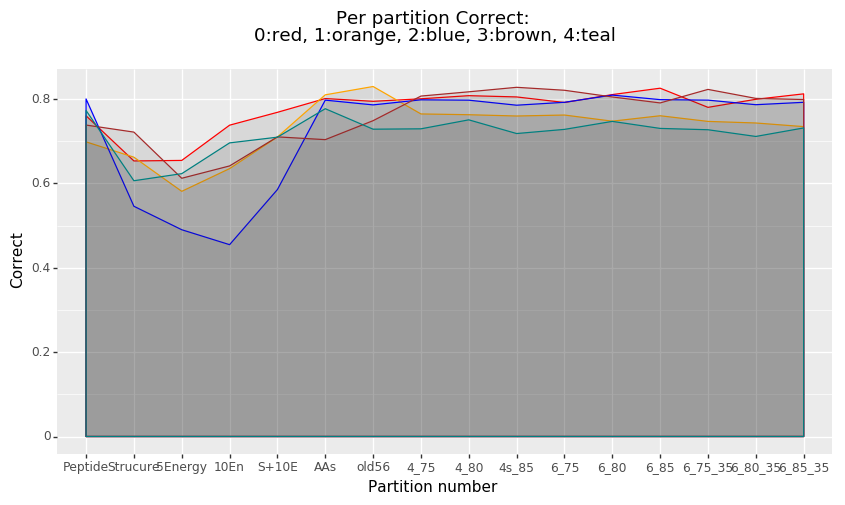

<ggplot: (-9223363250213628114)>


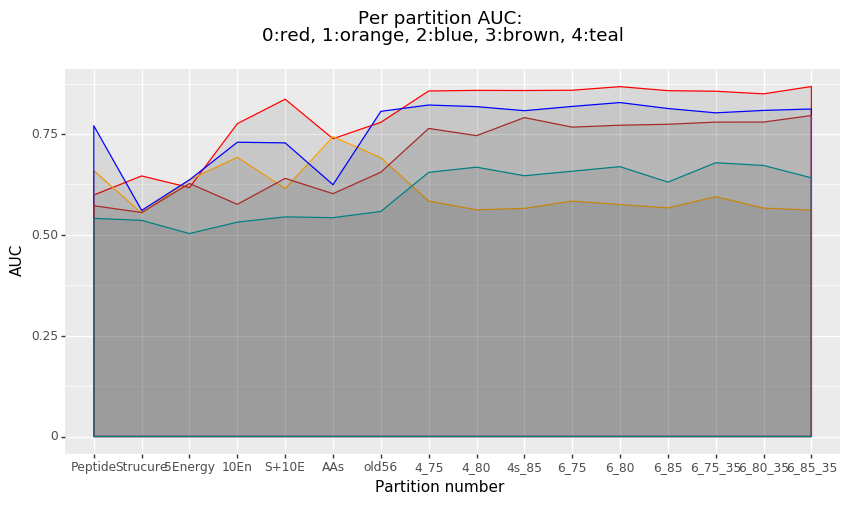

<ggplot: (8786551365587)>


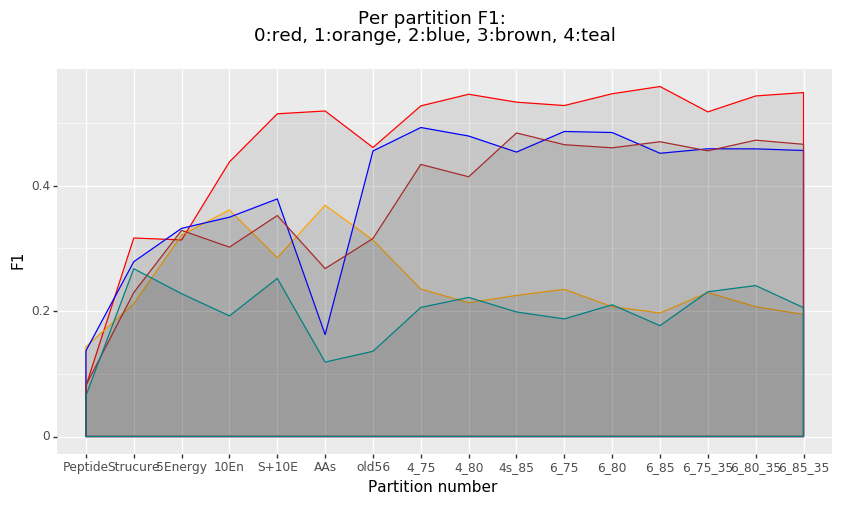

<ggplot: (8786552018275)>


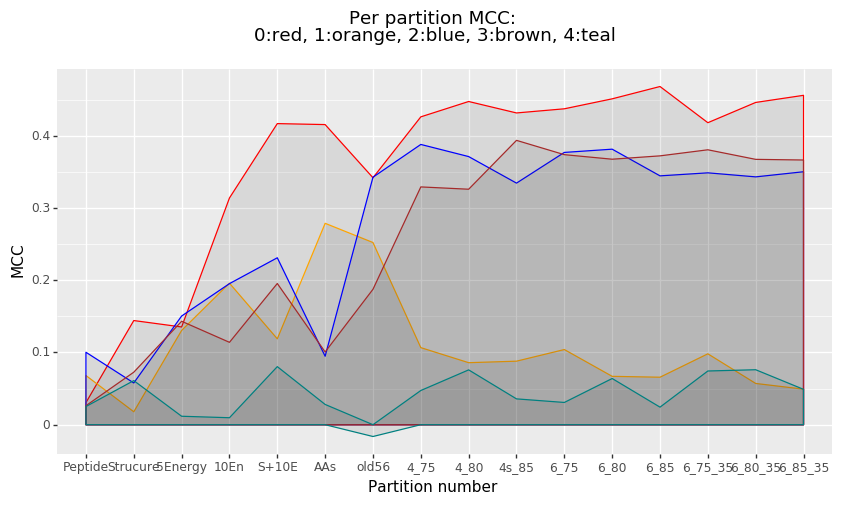

<ggplot: (-9223363250215674571)>


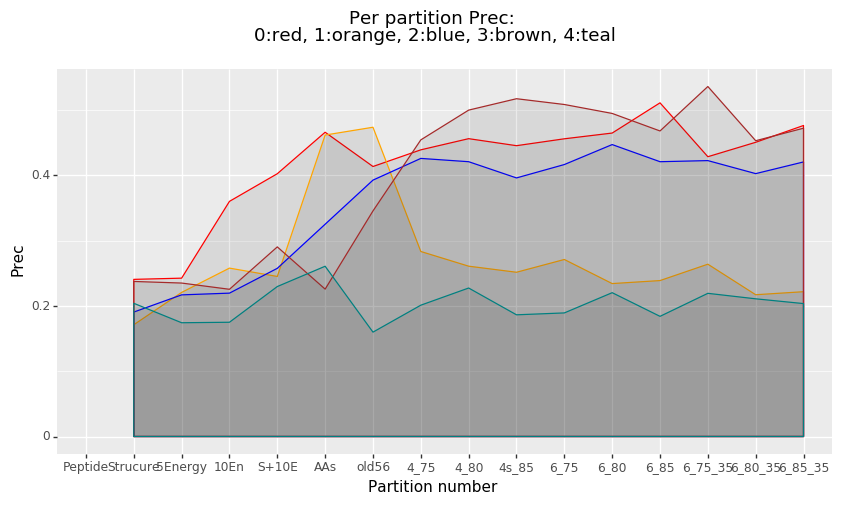

<ggplot: (8786552033193)>


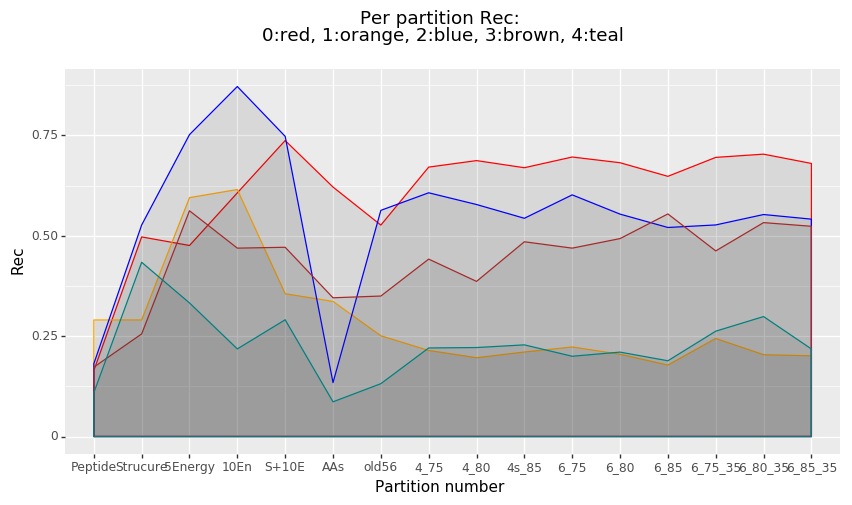

<ggplot: (8786551685142)>


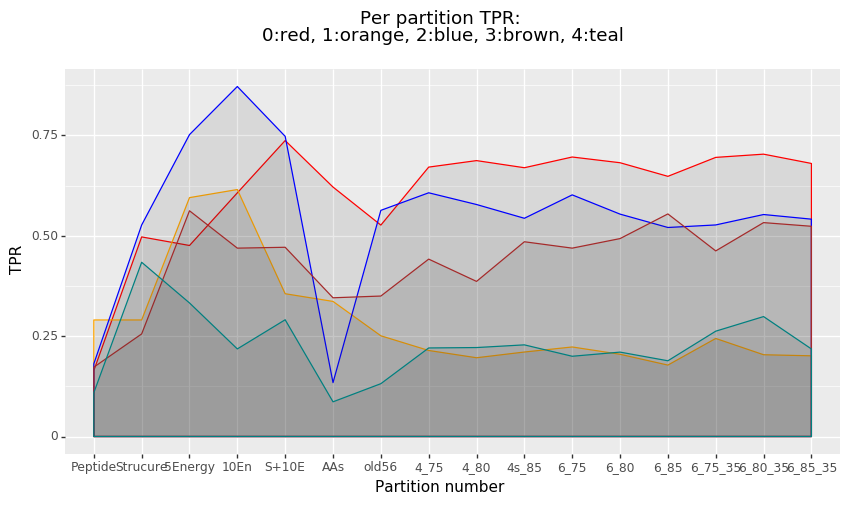

<ggplot: (8786551170333)>


In [163]:
if super_score == True:
    for i in range(len(master_dfs)):
        dfs = master_dfs[i]
        melt_df = dfs[0]
        title = "Per partition "+ str(score_list[i]) + ":\n 0:red, 1:orange, 2:blue, 3:brown, 4:teal\n"
        
        print((ggplot(melt_df, aes("variable", "value", group = 0)) #Group together averages
        + geom_area(data = dfs[0], color = "red", alpha = 0.1)
         + geom_area(data = dfs[1], color = "orange", alpha = 0.1)
         + geom_area(data = dfs[2], color = "blue", alpha = 0.1)
         + geom_area(data = dfs[3], color = "brown", alpha = 0.1)
         + geom_area(data = dfs[4], color = "teal", alpha = 0.1)
        #+ geom_boxplot(data = melt_df, color = "red", alpha = 0.6, width = 0.8, linetype = "dashed", outlier_alpha = 0.6)
        + ylab(str(score_list[i]))
        + xlab("Partition number")
        + ggtitle(title)
        + theme(figure_size =(10,5))
    ))
    


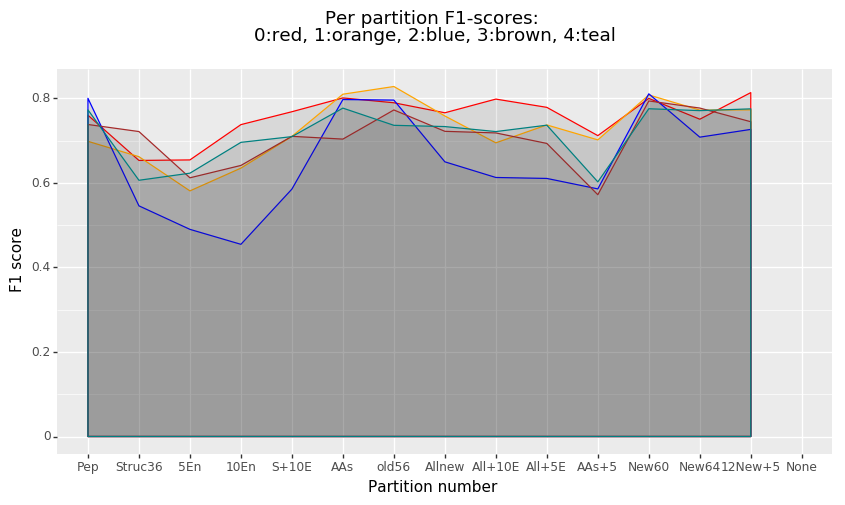

<ggplot: (8738846265664)>


In [546]:

print((ggplot(melt_df, aes("variable", "value", group = 0)) #Group together averages
    + geom_area(data = dfs[0], color = "red", alpha = 0.1)
     + geom_area(data = dfs[1], color = "orange", alpha = 0.1)
     + geom_area(data = dfs[2], color = "blue", alpha = 0.1)
     + geom_area(data = dfs[3], color = "brown", alpha = 0.1)
     + geom_area(data = dfs[4], color = "teal", alpha = 0.1)
    #+ geom_boxplot(data = melt_df, color = "red", alpha = 0.6, width = 0.8, linetype = "dashed", outlier_alpha = 0.6)
    + ylab("F1 score")
    + xlab("Partition number")
    + ggtitle("Per partition F1-scores:\n 0:red, 1:orange, 2:blue, 3:brown, 4:teal\n")
    + theme(figure_size =(10,5))
))

In [277]:
# old

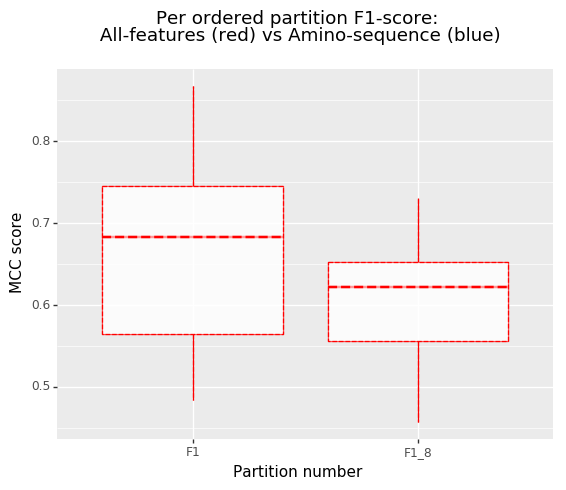

<ggplot: (-9223363298006665591)>

In [84]:
score = ["Correct", "AUC", "F1", "MCC", "Prec", "Rec", "TPR", "TNR"]

filenames = ["CSV/9sets.csv", "CSV/9sets.csv"]
comments = ["only10energy", "only5energy"]
score = ["AUC"]*len(filenames)
columns = list(map(str, list(range(0,20))[0:len(filenames)]))

df = feature_extract(score = len(filenames)*score,
                     filenames = filenames,
                     comments = comments)
df.columns = ["F1", "F1_8"]
melt_df = pd.melt(df.copy())


(ggplot(melt_df, aes("variable", "value"))
    + geom_boxplot(data = melt_df, color = "red", alpha = 0.6, width = 0.8, outlier_alpha = 0.6)
    + geom_boxplot(data = melt_df, color = "red", alpha = 0.6, width = 0.8, linetype = "dashed", outlier_alpha = 0.6)

    + ylab("MCC score")
    + xlab("Partition number")
    + ggtitle("Per ordered partition F1-score:\n All-features (red) vs Amino-sequence (blue)\n")
)

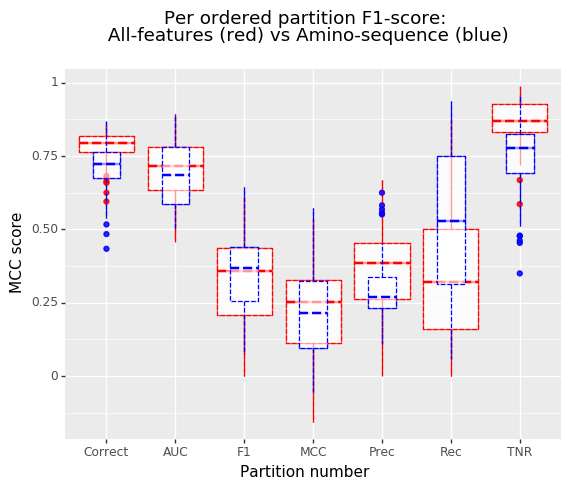

<ggplot: (-9223363298007363724)>

In [409]:
score = ["Correct", "AUC", "F1", "MCC", "Prec", "Rec", "TNR"]
columns = list(map(str, list(range(0,20))[0:len(score)]))

#df1
df = feature_extract(score = 1*score,
                     filenames = len(score)*["CSV/all.csv"],
                     comments = len(score)*["all56"])
df.columns = score
melt_df = pd.melt(df.copy())
melt_df["variable"] = pd.Categorical(melt_df["variable"], categories = df.columns, ordered=True)

#df2
df = feature_extract(score = 1*score,
                     filenames = len(score)*["CSV/7sets.csv"],
                     comments = len(score)*["allfeatures\+10"])
df.columns = score
melt_df2 = pd.melt(df.copy())
melt_df2["variable"] = pd.Categorical(melt_df2["variable"], categories = df.columns, ordered=True)

#Plot
(ggplot(melt_df, aes("variable", "value"))
    + geom_boxplot(data = melt_df2, color = "blue", alpha = 0.6, width = 0.4, outlier_alpha = 0.6)
    + geom_boxplot(data = melt_df, color = "red", alpha = 0.6, width = 0.8, outlier_alpha = 0.6)
    + geom_boxplot(data = melt_df, color = "red", alpha = 0.6, width = 0.8, linetype = "dashed", outlier_alpha = 0.6)
    + geom_boxplot(data = melt_df2, color = "blue", alpha = 0.6, width = 0.4, linetype = "dashed", outlier_alpha = 0.6)

    #+ geom_boxplot(data = melt_df3, color = "orange", alpha = 0.6, width = 0.8, outlier_alpha = 0.6)
    #+ geom_boxplot(data = melt_df3, color = "orange", alpha = 0.6, width = 0.8, linetype = "dashed", outlier_alpha = 0.6)

    + ylab("MCC score")
    + xlab("Partition number")
    + ggtitle("Per ordered partition F1-score:\n All-features (red) vs Amino-sequence (blue)\n")
)

### Random partitions vs ordered

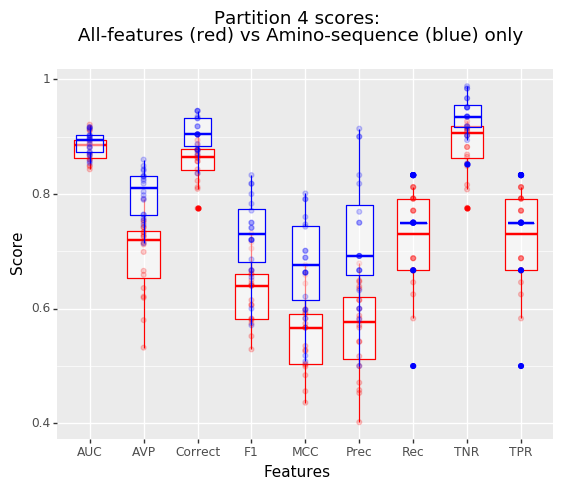

<ggplot: (-9223363249501550399)>

In [885]:
df = feature_extract(score = 9*["Correct", "AUC", "MCC", "F1", "AVP", "Prec", "Rec", "TPR", "TNR"],
                     filenames = 9*["rpall.csv"],
                     comments = 9*["56"], partitions = 9*[1])
df.columns = ["Correct", "AUC", "MCC", "F1", "AVP", "Prec", "Rec", "TPR", "TNR"]
melt_df = pd.melt(df.copy())

df = feature_extract(score = 9*["Correct", "AUC", "MCC", "F1", "AVP", "Prec", "Rec", "TPR", "TNR"],
                     filenames = 9*["rpaa.csv"],
                     comments = 9*["AAs"], partitions = 9*[1])
df.columns = ["Correct", "AUC", "MCC", "F1", "AVP", "Prec", "Rec", "TPR", "TNR"]
melt_df2 = pd.melt(df.copy())

(ggplot(melt_df, aes("variable", "value"))
    + geom_boxplot(data = melt_df, color = "red", alpha = 0.5, width = 0.6)
    + geom_point(data = melt_df, color = "red", alpha = 0.2)
    + geom_boxplot(data = melt_df2, color = "blue", alpha = 0.5, width = 0.5)
    + geom_point(data = melt_df2, color = "blue", alpha = 0.2)
    #+ geom_line(data = melt_df2)
    + ylab("Score")
    + xlab("Features")
    + ggtitle("Partition 4 scores:\n All-features (red) vs Amino-sequence (blue) only\n")
)

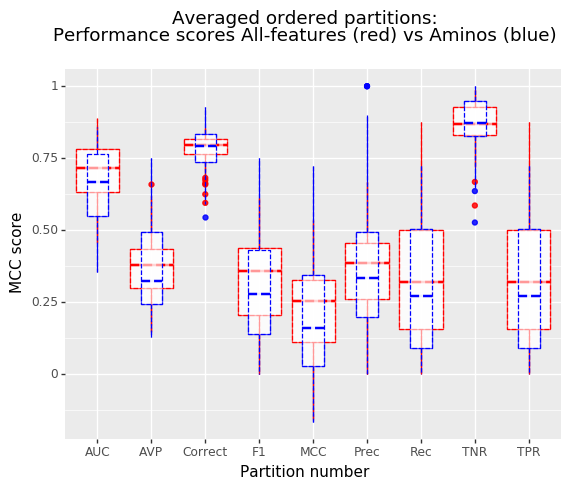

<ggplot: (-9223363249502531012)>

In [1153]:
df = feature_extract(score = 9*["Correct", "AUC", "MCC", "F1", "AVP", "Prec", "Rec", "TPR", "TNR"],
                     filenames = 9*["all.csv"],
                     comments = 9*["56"])
df.columns = ["Correct", "AUC", "MCC", "F1", "AVP", "Prec", "Rec", "TPR", "TNR"]
melt_df = pd.melt(df.copy())

df = feature_extract(score = 9*["Correct", "AUC", "MCC", "F1", "AVP", "Prec", "Rec", "TPR", "TNR"],
                     filenames = 9*["aa.csv"],
                     comments = 9*["AAs"])
df.columns = ["Correct", "AUC", "MCC", "F1", "AVP", "Prec", "Rec", "TPR", "TNR"]
melt_df2 = pd.melt(df.copy())

(ggplot(melt_df, aes("variable", "value"))
    + geom_boxplot(data = melt_df2, color = "blue", alpha = 0.6, width = 0.4, outlier_alpha = 0.6)
    + geom_boxplot(data = melt_df, color = "red", alpha = 0.6, width = 0.8, outlier_alpha = 0.6)
    + geom_boxplot(data = melt_df, color = "red", alpha = 0.6, width = 0.8, linetype = "dashed", outlier_alpha = 0.6)
    + geom_boxplot(data = melt_df2, color = "blue", alpha = 0.6, width = 0.4, linetype = "dashed", outlier_alpha = 0.6)

    #+ geom_line(data = melt_df2)
    + ylab("MCC score")
    + xlab("Partition number")
    + ggtitle("Averaged ordered partitions:\nPerformance scores All-features (red) vs Aminos (blue)\n")
)

In [1154]:
# All-features
df = feature_extract(score = 9*["Correct", "AUC", "MCC", "F1", "AVP", "Prec", "Rec", "TPR", "TNR"],
                     filenames = 9*["all.csv"],
                     comments = 9*["56"])
df.columns = ["Correct", "AUC", "MCC", "F1", "AVP", "Prec", "Rec", "TPR", "TNR"]
df.describe()

,Correct,AUC,MCC,F1,AVP,Prec,Rec,TPR,TNR
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.78438,0.698970,0.220530,0.329560,0.367130,0.357010,0.352040,0.352040,0.870780
std,0.05055,0.107196,0.166421,0.153553,0.114832,0.146247,0.219016,0.219016,0.072425
min,0.59500,0.456000,-0.157000,0.000000,0.147000,0.000000,0.000000,0.000000,0.586000
25%,0.76425,0.633500,0.113750,0.207500,0.300000,0.262000,0.159000,0.159000,0.831250
50%,0.79500,0.717000,0.253500,0.359500,0.379500,0.387000,0.319500,0.319500,0.869500
75%,0.81825,0.780750,0.326250,0.437000,0.436250,0.455000,0.500000,0.500000,0.928000
max,0.85600,0.889000,0.536000,0.613000,0.662000,0.667000,0.875000,0.875000,0.988000


In [1156]:
df

,Correct,AUC,MCC,F1,AVP,Prec,Rec,TPR,TNR
0,0.798,0.711,0.406,0.514,0.652,0.429,0.643,0.643,0.829
1,0.878,0.751,0.523,0.587,0.627,0.675,0.519,0.519,0.950
2,0.837,0.776,0.292,0.356,0.398,0.520,0.271,0.271,0.950
3,0.621,0.536,0.029,0.242,0.204,0.182,0.364,0.364,0.673
4,0.799,0.522,0.048,0.131,0.257,0.235,0.091,0.091,0.941
5,0.821,0.785,0.445,0.545,0.728,0.474,0.643,0.643,0.857
6,0.859,0.768,0.387,0.421,0.507,0.667,0.308,0.308,0.969
7,0.722,0.788,-0.158,0.000,0.318,0.000,0.000,0.000,0.867
8,0.788,0.716,0.434,0.533,0.426,0.421,0.727,0.727,0.800
9,0.727,0.567,-0.059,0.100,0.186,0.111,0.091,0.091,0.855


In [1157]:
# AAs
df = feature_extract(score = 9*["Correct", "AUC", "MCC", "F1", "AVP", "Prec", "Rec", "TPR", "TNR"],
                     filenames = 9*["aa.csv"],
                     comments = 9*["AAs"])
df.columns = ["Correct", "AUC", "MCC", "F1", "AVP", "Prec", "Rec", "TPR", "TNR"]
df.describe()

,Correct,AUC,MCC,F1,AVP,Prec,Rec,TPR,TNR
count,100.000000,100.000000,100.000000,100.000000,100.000000,98.000000,100.000000,100.000000,100.000000
mean,0.777650,0.650040,0.183570,0.287320,0.374060,0.352041,0.304910,0.304910,0.872320
std,0.068224,0.120361,0.194347,0.180524,0.163759,0.219179,0.225751,0.225751,0.092629
min,0.545000,0.357000,-0.166000,0.000000,0.128000,0.000000,0.000000,0.000000,0.527000
25%,0.735500,0.551000,0.028250,0.140500,0.245500,0.200000,0.091000,0.091000,0.826250
50%,0.792000,0.666000,0.162000,0.278000,0.323500,0.333000,0.273000,0.273000,0.874000
75%,0.833000,0.764500,0.346500,0.431250,0.493750,0.493500,0.504750,0.504750,0.950000
max,0.929000,0.859000,0.723000,0.750000,0.750000,1.000000,0.727000,0.727000,1.000000


In [1158]:
df

,Correct,AUC,MCC,F1,AVP,Prec,Rec,TPR,TNR
0,0.798,0.711,0.406,0.514,0.652,0.429,0.643,0.643,0.829
1,0.878,0.751,0.523,0.587,0.627,0.675,0.519,0.519,0.950
2,0.837,0.776,0.292,0.356,0.398,0.520,0.271,0.271,0.950
3,0.621,0.536,0.029,0.242,0.204,0.182,0.364,0.364,0.673
4,0.799,0.522,0.048,0.131,0.257,0.235,0.091,0.091,0.941
5,0.821,0.785,0.445,0.545,0.728,0.474,0.643,0.643,0.857
6,0.859,0.768,0.387,0.421,0.507,0.667,0.308,0.308,0.969
7,0.722,0.788,-0.158,0.000,0.318,0.000,0.000,0.000,0.867
8,0.788,0.716,0.434,0.533,0.426,0.421,0.727,0.727,0.800
9,0.727,0.567,-0.059,0.100,0.186,0.111,0.091,0.091,0.855


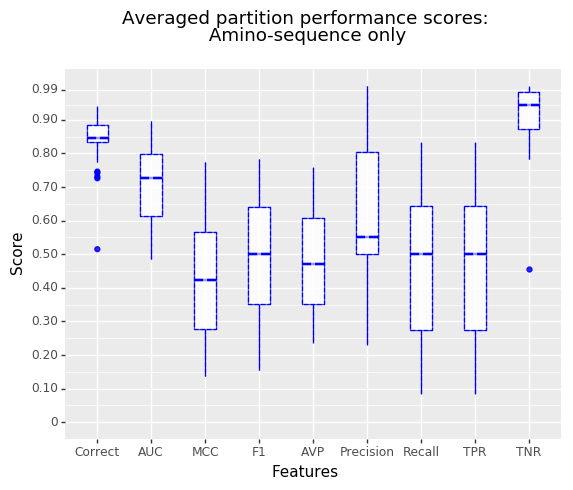

<ggplot: (8786549209359)>

In [1063]:
df = feature_extract(score = 9*["Correct", "AUC", "MCC", "F1", "AVP", "Prec", "Rec", "TPR", "TNR"],
                     filenames = 9*["CSV/CSV_big3.csv"],
                     comments = 9*["AAs"])
df.columns = ["Correct", "AUC", "MCC", "F1", "AVP", "Precision", "Recall", "TPR", "TNR"]
melt_df2 = pd.melt(df.copy())
melt_df2["variable"] = pd.Categorical(melt_df2["variable"], categories = df.columns, ordered=True)


(ggplot(melt_df2, aes("variable", "value"))
    + geom_boxplot(data = melt_df2, color = "blue", alpha = 0.6, width = 0.4, outlier_alpha = 0.6)
    #+ geom_boxplot(data = melt_df, color = "red", alpha = 0.6, width = 0.8, outlier_alpha = 0.6)
    #+ geom_boxplot(data = melt_df, color = "red", alpha = 0.6, width = 0.8, linetype = "dashed", outlier_alpha = 0.6)
    + geom_boxplot(data = melt_df2, color = "blue", alpha = 0.6, width = 0.4, linetype = "dashed", outlier_alpha = 0.6)
    #+ geom_line(data = melt_df2)
    + ylab("Score")
    + xlab("Features")
    + expand_limits(y = [0,1])
    + scale_y_continuous(limit = [0, 1.0],
                    breaks = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99])
    + ggtitle("Averaged partition performance scores:\n Amino-sequence only\n")
)

In [26]:
df = feature_extract2(score = 9*["Correct", "AUC", "MCC", "F1", "AVP", "Prec", "Rec", "TPR", "TNR"],
                     filenames = 9*["CSV/aa2.csv"],
                     comments = 9*["AAs"],
                    partitions = [0])
df.columns = ["Correct", "AUC", "MCC", "F1", "AVP", "Precision", "Recall", "TPR", "TNR"]
melt_df2 = pd.melt(df.copy())
melt_df2["variable"] = pd.Categorical(melt_df2["variable"], categories = df.columns, ordered=True)


In [ ]:
melt_df = df0
melt_df["variable"] = pd.Categorical(melt_df["variable"], categories = df.columns, ordered=True)

(ggplot(melt_df, aes("variable", "value", group = 0))
    + geom_point(color = "red")
    + geom_line(color = "red")
    + geom_point(color = "orange", data = df1)
    + geom_line(color = "orange", data = df1)
    + geom_point(color = "brown", data = df2)
    + geom_line(color = "brown", data = df2)
    + geom_point(color = "blue", data = df3)
    + geom_line(color = "blue", data = df3)
    + geom_point(color = "darkblue", data = df4)
    + geom_line(color = "darkblue", data = df4)
    + scale_y_continuous(limit = [0, 1.0],
                        breaks = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99],
                         labels = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    + ylab("Score")
    + xlab("Features")
    + ggtitle("Performance score correlations between all partitions\n")
    #+ theme_light()
)

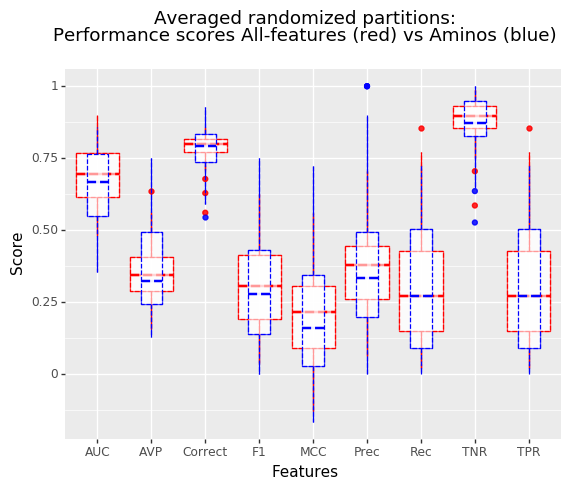

<ggplot: (-9223363249571782933)>

In [1209]:
df = feature_extract(score = 9*["Correct", "AUC", "MCC", "F1", "AVP", "Prec", "Rec", "TPR", "TNR"],
                     filenames = 9*["8all.csv"],
                     comments = 9*["53"])
df.columns = ["Correct", "AUC", "MCC", "F1", "AVP", "Prec", "Rec", "TPR", "TNR"]
melt_df = pd.melt(df.copy())

df = feature_extract(score = 9*["Correct", "AUC", "MCC", "F1", "AVP", "Prec", "Rec", "TPR", "TNR"],
                     filenames = 9*["aa.csv"],
                     comments = 9*["AAs"])
df.columns = ["Correct", "AUC", "MCC", "F1", "AVP", "Prec", "Rec", "TPR", "TNR"]
melt_df2 = pd.melt(df.copy())

(ggplot(melt_df, aes("variable", "value"))
    + geom_boxplot(data = melt_df2, color = "blue", alpha = 0.6, width = 0.4, outlier_alpha = 0.6)
    + geom_boxplot(data = melt_df, color = "red", alpha = 0.6, width = 0.8, outlier_alpha = 0.6)
    + geom_boxplot(data = melt_df, color = "red", alpha = 0.6, width = 0.8, linetype = "dashed", outlier_alpha = 0.6)
    + geom_boxplot(data = melt_df2, color = "blue", alpha = 0.6, width = 0.4, linetype = "dashed", outlier_alpha = 0.6)
    #+ geom_line(data = melt_df2)
    + ylab("Score")
    + xlab("Features")
    + ggtitle("Averaged randomized partitions:\nPerformance scores All-features (red) vs Aminos (blue)\n")
)

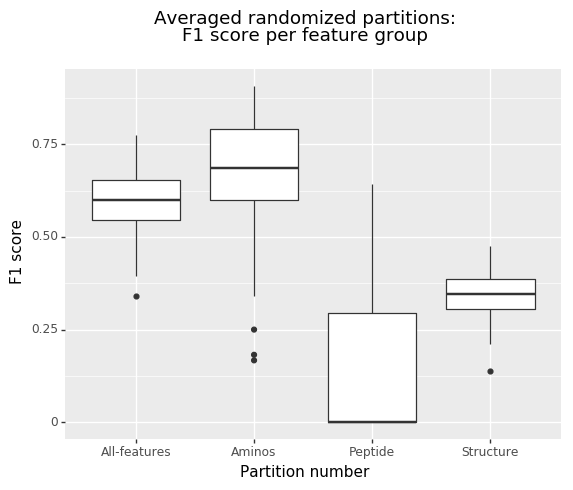

<ggplot: (8787354061260)>

In [1194]:
df = feature_extract(score = 4*["F1"],
                     filenames = ["rpall.csv", "rpaa.csv", "rpaa.csv", "rpstruc.csv"],
                     comments = ["56", "AAs", "AApep", "36"])

df.columns = ["All-features", "Aminos", "Peptide", "Structure"]
melt_df = pd.melt(df.copy())
melt_df["variable"] = pd.Categorical(melt_df["variable"], categories = df.columns, ordered=True)

(ggplot(melt_df, aes("variable", "value"))
    + geom_boxplot(data = melt_df)
    + ylab("F1 score")
    + xlab("Partition number")
    + ggtitle("Averaged randomized partitions:\nF1 score per feature group\n")
)

In [1020]:
def countzeros(df, column):
    r = re.compile(".*0.0,.*")
    find = list(Counter(df[column]).most_common())
    find = list(map(str, find))
    return list(filter(r.match, find))

In [1021]:
countzeros(df, "All-features")

['(0.0, 2)']

In [1022]:
countzeros(df, "Aminos")

['(0.0, 8)']

In [911]:
df = feature_extract(score = 4*["F1"],
                     filenames = ["all.csv", "aa.csv", "aa.csv", "struc.csv"],
                     comments = ["56", "AAs", "AApep", "36"])
df.columns = ["All-features", "Aminos", "Peptide", "Structure"]
df.describe()

,All-features,Aminos,Peptide,Structure
count,100.000000,100.000000,100.00000,100.000000
mean,0.329560,0.287320,0.20429,0.252460
std,0.153553,0.180524,0.20794,0.060439
min,0.000000,0.000000,0.00000,0.072000
25%,0.207500,0.140500,0.00000,0.223500
50%,0.359500,0.278000,0.14800,0.255500
75%,0.437000,0.431250,0.37650,0.284000
max,0.613000,0.750000,0.63600,0.425000


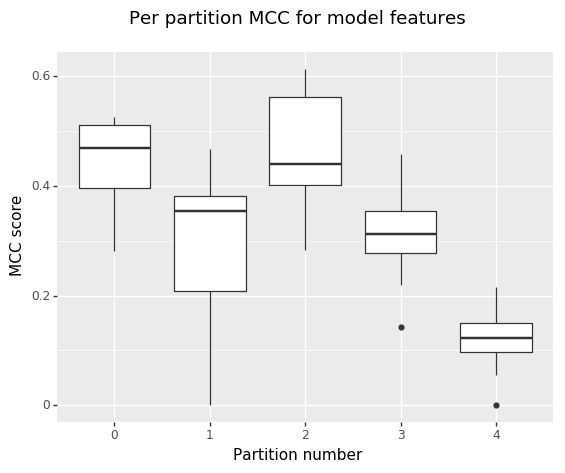

<ggplot: (-9223363249506688375)>

In [828]:
df = feature_extract(score = 5*["F1"],
                     filenames = 5*["all.csv"],
                     comments = 5*["56"], partitions = [0,1,2,3,4])
df.columns = ["0", "1", "2", "3", "4"]
melt_df = pd.melt(df.copy())

(ggplot(melt_df, aes("variable", "value"))
    + geom_boxplot(data = melt_df)
    + ylab("MCC score")
    + xlab("Partition number")
    + ggtitle("Per partition MCC for model features\n")
)

### Correlation between performance measures

In [486]:
pd.read_csv("aa.csv").columns

Index(['Comment', 'Test', 'Validation', 'Training', 'Correct', 'AUC', 'MCC',
       'F1', 'AVP', 'TPR', 'TNR', 'Prec', 'Rec', 'Confusion matrix', 'LR',
       'Duration (s)', 'Timestamp'],
      dtype='object')

In [504]:
df_all = df.apply(lambda x: np.average(x))

AUC          0.69509
MCC          0.21738
F1           0.31920
AVP          0.36267
Precision    0.37419
Recall       0.32381
TPR          0.32381
TNR          0.88443
dtype: float64

### All performances each partition

In [524]:
pd.melt(pd.DataFrame(df_all).transpose())

,variable,value
0,0,0.69509
1,0,0.21738
2,0,0.31920
3,0,0.36267
4,0,0.37419
5,0,0.32381
6,0,0.32381
7,0,0.88443


In [522]:
df_all.columns

Index(['AUC', 'MCC', 'F1', 'AVP', 'Precision', 'Recall', 'TPR', 'TNR'], dtype='object')

In [539]:
df_all.values

array([[0.69509, 0.21738, 0.3192 , 0.36267, 0.37419, 0.32381, 0.32381,
        0.88443]])

In [547]:
melt_df

,variable,value
0,AUC,0.69509
1,MCC,0.21738
2,F1,0.31920
3,AVP,0.36267
4,Precision,0.37419
5,Recall,0.32381
6,TPR,0.32381
7,TNR,0.88443


In [20]:
filename = ["all.csv"]
comment = ["AAs"]
columns = ["Correct", "AUC", "MCC", "F1", "AVP", "Prec", "Rec", "TPR", "TNR"]
new_columns = ["Correct", "AUC", "MCC", "F1-score", "AVP", "Precision", "Recall", "TPR", "TNR"]
length = 9

df = feature_extract(score = columns, filenames = length*filename, partitions=length*[0], comments = length*comment)
df.columns = new_columns
df0 = pd.melt(pd.DataFrame(df.apply(lambda x: np.average(x))).transpose())

df = feature_extract(score = columns, filenames = length*filename, partitions=length*[1], comments = length*comment)
df.columns = new_columns
df1 = pd.melt(pd.DataFrame(df.apply(lambda x: np.average(x))).transpose())

df = feature_extract(score = columns, filenames = length*filename, partitions=length*[2], comments = length*comment)
df.columns = new_columns
df2 = pd.melt(pd.DataFrame(df.apply(lambda x: np.average(x))).transpose())

df = feature_extract(score = columns, filenames = length*filename, partitions=length*[3], comments = length*comment)
df.columns = new_columns
df3 = pd.melt(pd.DataFrame(df.apply(lambda x: np.average(x))).transpose())

df = feature_extract(score = columns, filenames = length*filename, partitions=length*[4], comments = length*comment)
df.columns = new_columns
df4 = pd.melt(pd.DataFrame(df.apply(lambda x: np.average(x))).transpose())

ValueError: Length mismatch: Expected axis has 0 elements, new values have 20 elements

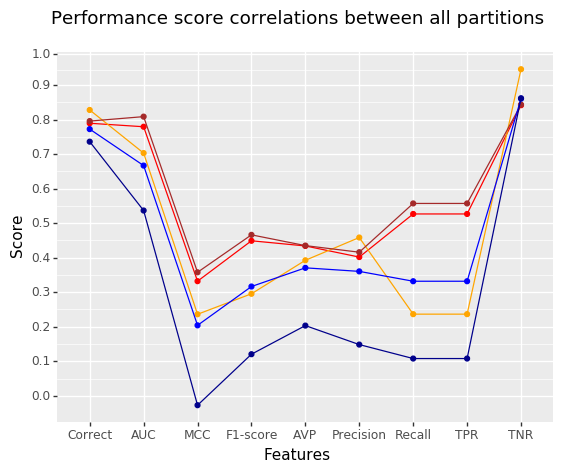

<ggplot: (-9223363249407843619)>

In [736]:
melt_df = df0
melt_df["variable"] = pd.Categorical(melt_df["variable"], categories = df.columns, ordered=True)

(ggplot(melt_df, aes("variable", "value", group = 0))
    + geom_point(color = "red")
    + geom_line(color = "red")
    + geom_point(color = "orange", data = df1)
    + geom_line(color = "orange", data = df1)
    + geom_point(color = "brown", data = df2)
    + geom_line(color = "brown", data = df2)
    + geom_point(color = "blue", data = df3)
    + geom_line(color = "blue", data = df3)
    + geom_point(color = "darkblue", data = df4)
    + geom_line(color = "darkblue", data = df4)
    + scale_y_continuous(limit = [0, 1.0],
                        breaks = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99],
                         labels = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    + ylab("Score")
    + xlab("Features")
    + ggtitle("Performance score correlations between all partitions\n")
    #+ theme_light()
)

### All performances

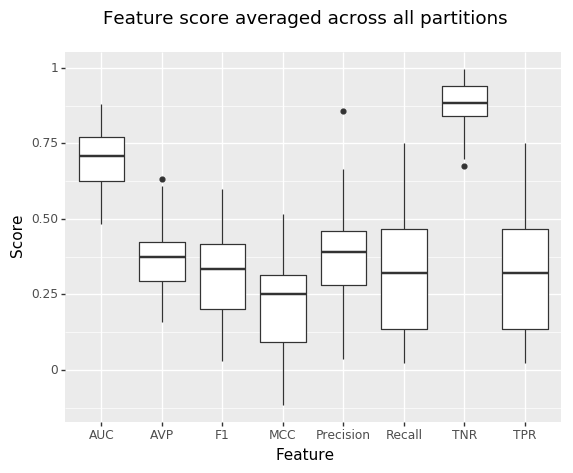

<ggplot: (8787354583507)>

In [501]:
df = feature_extract(score = ["AUC", "MCC", "F1", "AVP", "Prec", "Rec", "TPR", "TNR"],
                     filenames = 8*["all.csv"],
                     comments = 8*["53"])
df.columns = ["AUC", "MCC", "F1", "AVP", "Precision", "Recall", "TPR", "TNR"]
melt_df = pd.melt(df)

(ggplot(melt_df, aes("variable", "value"))
    + geom_boxplot()
    + ylab("Score")
    + xlab("Feature")
    + ggtitle("Feature score averaged across all partitions\n")
)